In [2]:
import numpy as np
import pandas as pd

In [3]:
!wget 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv'

--2025-04-24 13:37:48--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.169.201.165, 3.169.201.14, 3.169.201.143, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.169.201.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  --.-KB/s    in 0.1s    

2025-04-24 13:37:49 (25.5 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



In [4]:
df = pd.read_csv('netflix.csv')

In [5]:
# 2. Observations on the shape of data, data types of all the attributes,
# conversion of categorical attributes to 'category' (If required),
# missing value detection, statistical summary
df.shape

(8807, 12)

In [6]:
df.info()
# only the release year has int data type except all are object that is string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# testing column wise to which column can be converted to category or to another datatype
df[['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'rating',
 'duration',
 'listed_in',
 'description']].nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
rating,17
duration,220
listed_in,514


In [8]:
df[['type','rating','country','listed_in']].nunique()
# i found that only type, rating, country and listed_in are the ones with limited category so converting them would be sufficient.

,0
type,2
rating,17
country,748
listed_in,514


In [9]:
df[['type','rating','country','listed_in']]=df[['type','rating','country','listed_in']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      6173 non-null   object  
 4   cast          7982 non-null   object  
 5   country       7976 non-null   category
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8803 non-null   category
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   category
 11  description   8807 non-null   object  
dtypes: category(4), int64(1), object(7)
memory usage: 645.2+ KB


In [10]:
# missing value detection
df.isna().sum()
percentage_of_missing_value=round(df.isnull().mean()*100,2).reset_index()
percentage_of_missing_value.columns = ['Column Name', 'Missing Percentage']
percentage_of_missing_value

,Column Name,Missing Percentage
0,show_id,0.00
1,type,0.00
2,title,0.00
3,director,29.91
4,cast,9.37
5,country,9.44
6,date_added,0.11
7,release_year,0.00
8,rating,0.05
9,duration,0.03


In [11]:
# statistical summary
numerical_dtype=df.describe()
print(numerical_dtype)
# df['release_year'].nunique()---> only 74
# here min year 1925 and max year 2021 means data for 74 years

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [12]:
categorical_dtype=df.describe(include='object')
categorical_dtype



,show_id,title,director,cast,date_added,duration,description
count,8807,8807,6173,7982,8797,8804,8807
unique,8807,8807,4528,7692,1767,220,8775
top,s8807,Zubaan,Rajiv Chilaka,David Attenborough,"January 1, 2020",1 Season,"Paranormal activity at a lush, abandoned prope..."
freq,1,1,19,19,109,1793,4


# Rajiv Chilaka has been the most frequent in terms of directing more  number of movies
# paranormal description apeared most frquently
# David Attenborough appered maximum in the cast

 Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points

In [13]:
# df['country'].value_counts()
df['country'].value_counts()

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
...,...
"Australia, Iraq",1
Venezuela,1
"Venezuela, Colombia",1


In [14]:
df['country'].value_counts()
df['rating'].value_counts()
df['duration'].value_counts(ascending=False)
duration_no_of_season=df[df['type']=='TV Show'].groupby('duration')['title'].count()



In [15]:
# we have seen the data that nested columns are nested with comma and
def find_nested_col(df):
  names_of_nested=[]
  for i in df.columns:
        # Check if any value in the column is a string and contains a comma
        if df[i].apply(lambda x: isinstance(x, str) and "," in x).any():
            names_of_nested.append(i)
  return names_of_nested

find=find_nested_col(df)
print(find)

['title', 'director', 'cast', 'country', 'date_added', 'listed_in', 'description']


Need to make dataframe of column wise which has nested data in  them and make them

In [16]:
df_cast_split=df['cast'].str.split(', ') # don't expand we need all data in single column rowwise to use the explode
df_cast=pd.concat([df['title'],df_cast_split],axis=1)
df_cast=df_cast.explode(['cast'])
df_cast.rename(columns={'cast':'Individual_actor'},inplace=True)
df_cast
# df_cast_split.explode('cast')# for explode to work data must be in the list first

,title,Individual_actor
0,Dick Johnson Is Dead,NaN
1,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
1,Blood & Water,Gail Mabalane
1,Blood & Water,Thabang Molaba
...,...,...
8806,Zubaan,Manish Chaudhary
8806,Zubaan,Meghna Malik
8806,Zubaan,Malkeet Rauni
8806,Zubaan,Anita Shabdish


In [17]:
# for director ---> use str split function
df_director_split=df['director'].str.split(', ') # don't expand we need all data in single column rowwise
df_director=pd.concat([df['title'],df_director_split],axis=1)
df_director=df_director.explode(['director'])
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,NaN
4,Kota Factory,NaN
...,...,...
8802,Zodiac,David Fincher
8803,Zombie Dumb,NaN
8804,Zombieland,Ruben Fleischer
8805,Zoom,Peter Hewitt


In [18]:
# for country df
df_country_split=df['country'].str.split(', ') # don't expand we need all data in single column rowwise
df_country=pd.concat([df['title'],df_country_split],axis=1)
df_country=df_country.explode(['country'])
df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,NaN
3,Jailbirds New Orleans,NaN
4,Kota Factory,India
...,...,...
8802,Zodiac,United States
8803,Zombie Dumb,NaN
8804,Zombieland,United States
8805,Zoom,United States


In [19]:
# for the listed_in df
df_listed_in_split=df['listed_in'].str.split(', ') # don't expand we need all data in single column rowwise
df_listed_in=pd.concat([df['title'],df_listed_in_split],axis=1)
df_listed_in=df_listed_in.explode(['listed_in'])
df_listed_in

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
1,Blood & Water,TV Mysteries
2,Ganglands,Crime TV Shows
...,...,...
8805,Zoom,Children & Family Movies
8805,Zoom,Comedies
8806,Zubaan,Dramas
8806,Zubaan,International Movies


In [20]:
#merging all the relevant dataframe with each other
dfs=[df_cast,df_country,df_director,df_listed_in]

merged_df=dfs[0]
for i in dfs[1:]:
  merged_df=pd.merge(merged_df,i,how='inner',on='title')
merged_df



,title,Individual_actor,country,director,listed_in
0,Dick Johnson Is Dead,NaN,United States,Kirsten Johnson,Documentaries
1,Blood & Water,Ama Qamata,South Africa,NaN,International TV Shows
2,Blood & Water,Ama Qamata,South Africa,NaN,TV Dramas
3,Blood & Water,Ama Qamata,South Africa,NaN,TV Mysteries
4,Blood & Water,Khosi Ngema,South Africa,NaN,International TV Shows
...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,India,Mozez Singh,International Movies
201987,Zubaan,Anita Shabdish,India,Mozez Singh,Music & Musicals
201988,Zubaan,Chittaranjan Tripathy,India,Mozez Singh,Dramas
201989,Zubaan,Chittaranjan Tripathy,India,Mozez Singh,International Movies


In [21]:
# now merge with the main df with relevant columns
df_final=merged_df.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']])
df_final

,title,Individual_actor,country,director,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,NaN,United States,Kirsten Johnson,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,South Africa,NaN,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,South Africa,NaN,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,South Africa,NaN,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,South Africa,NaN,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,India,Mozez Singh,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201987,Zubaan,Anita Shabdish,India,Mozez Singh,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201988,Zubaan,Chittaranjan Tripathy,India,Mozez Singh,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201989,Zubaan,Chittaranjan Tripathy,India,Mozez Singh,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [22]:
# now need to check the nulls and deal with nulls and missing values
df_final.isnull().sum() # for column wise null values
# df.isnull().sum(axis=1).sort_values(ascending=False)---> not much of use row wise null values

,0
title,0
Individual_actor,2146
country,11897
director,50643
listed_in,0
show_id,0
type,0
date_added,158
release_year,0
rating,67


In [23]:
# to fill the null values in director's column it is better to fill with unknown
df_final['director']= df_final['director'].fillna('Unknown_director')

In [24]:
df_final['director'].unique()
# we still have nan of string

array(['Kirsten Johnson', 'Unknown_director', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [25]:
df_final['director']=df_final['director'].replace(['nan'], ['Unknown_director'])

In [26]:
df_final['Individual_actor']=df_final['Individual_actor'].replace(['nan'], ['Unknown_actor'])
df_final['country']=df_final['country'].replace(['nan'], ['Unknown_country'])

In [27]:
df_final['country']=df_final['country'].fillna('Unknown_country')

In [28]:
df_final['Individual_actor']=df_final['Individual_actor'].replace(['NaN',np.nan], 'Unknown_actor')
# Replace both np.nan and the string 'NaN' if unsure about the values


In [29]:
df_final.isna().sum()
x=df_final.loc[df_final['rating'].isna()]
x
# print(x.to_string()) # this function to print all the values

,title,Individual_actor,country,director,listed_in,show_id,type,date_added,release_year,rating,duration
135125,13TH: A Conversation with Oprah Winfrey & Ava ...,Oprah Winfrey,Unknown_country,Unknown_director,Movies,s5990,Movie,"January 26, 2017",2017,NaN,37 min
135126,13TH: A Conversation with Oprah Winfrey & Ava ...,Ava DuVernay,Unknown_country,Unknown_director,Movies,s5990,Movie,"January 26, 2017",2017,NaN,37 min
154377,Gargantia on the Verdurous Planet,Kaito Ishikawa,Japan,Unknown_director,Anime Series,s6828,TV Show,"December 1, 2016",2013,NaN,1 Season
154378,Gargantia on the Verdurous Planet,Kaito Ishikawa,Japan,Unknown_director,International TV Shows,s6828,TV Show,"December 1, 2016",2013,NaN,1 Season
154379,Gargantia on the Verdurous Planet,Hisako Kanemoto,Japan,Unknown_director,Anime Series,s6828,TV Show,"December 1, 2016",2013,NaN,1 Season
...,...,...,...,...,...,...,...,...,...,...,...
171942,My Honor Was Loyalty,Francesco Migliore,Italy,Alessandro Pepe,Dramas,s7538,Movie,"March 1, 2017",2015,NaN,115 min
171943,My Honor Was Loyalty,Albrecht Weimer,Italy,Alessandro Pepe,Dramas,s7538,Movie,"March 1, 2017",2015,NaN,115 min
171944,My Honor Was Loyalty,Giulia Dichiaro,Italy,Alessandro Pepe,Dramas,s7538,Movie,"March 1, 2017",2015,NaN,115 min
171945,My Honor Was Loyalty,Alessandra Oriti Niosi,Italy,Alessandro Pepe,Dramas,s7538,Movie,"March 1, 2017",2015,NaN,115 min


In [30]:
df_final.loc[df_final['duration'].isna()]
# excel is the best tool to see that kind of values where values substitiuted into the corresponding column

,title,Individual_actor,country,director,listed_in,show_id,type,date_added,release_year,rating,duration
126537,Louis C.K. 2017,Louis C.K.,United States,Louis C.K.,Movies,s5542,Movie,"April 4, 2017",2017,74 min,NaN
131603,Louis C.K.: Hilarious,Louis C.K.,United States,Louis C.K.,Movies,s5795,Movie,"September 16, 2016",2010,84 min,NaN
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,Louis C.K.,Movies,s5814,Movie,"August 15, 2016",2015,66 min,NaN


In [31]:
df_final.loc[df_final['duration'].isna()].index # to get the row number
# excel is the best tool to see that kind of values where values substitiuted into the corresponding column

Index([126537, 131603, 131737], dtype='int64')

In [32]:
# filling the null values in duration but they were present in the rating column
df_final.loc[df_final['duration'].isnull()]
df_final['duration']=df_final['duration'].fillna(df_final['rating'])

In [33]:
df_final['rating']=df_final['rating'].astype(str) # no need to convert rating to categories type
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   title             201991 non-null  object  
 1   Individual_actor  201991 non-null  object  
 2   country           201991 non-null  object  
 3   director          201991 non-null  object  
 4   listed_in         201991 non-null  object  
 5   show_id           201991 non-null  object  
 6   type              201991 non-null  category
 7   date_added        201833 non-null  object  
 8   release_year      201991 non-null  int64   
 9   rating            201991 non-null  object  
 10  duration          201991 non-null  object  
dtypes: category(1), int64(1), object(9)
memory usage: 15.6+ MB


In [34]:
# but also need to remove these values of rating where they contains the values of duration
# if ever try to masking on the column containing null values do specify na=false
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='Not_available'



In [35]:
df_final.loc[df_final['rating'].str.contains('Not')]


,title,Individual_actor,country,director,listed_in,show_id,type,date_added,release_year,rating,duration
126537,Louis C.K. 2017,Louis C.K.,United States,Louis C.K.,Movies,s5542,Movie,"April 4, 2017",2017,Not_available,74 min
131603,Louis C.K.: Hilarious,Louis C.K.,United States,Louis C.K.,Movies,s5795,Movie,"September 16, 2016",2010,Not_available,84 min
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,Louis C.K.,Movies,s5814,Movie,"August 15, 2016",2015,Not_available,66 min


In [36]:
df_final['date_added'].nunique()

1767

In [37]:
# df_final['date_added'].fillna(mode,inplace=True)

In [38]:
df_final.isna().sum()

# till here removed all the null values now need to correct the columns values

,0
title,0
Individual_actor,0
country,0
director,0
listed_in,0
show_id,0
type,0
date_added,158
release_year,0
rating,0


In [39]:
# here replacing the null values of date added column with  mode of the release_year on the yEAR basis date that would be the most appropriate approach
# when release year was 2013.So below piece of code just checks the mode of date added for release year=2013
years=df_final.loc[df_final['date_added'].isnull()]['release_year'].unique()
for year in years:
  mode_val=df_final[df_final['release_year']==year]['date_added'].mode().values[0] # is values[0] takes the first values if multiple modes
  if mode_val:
    df_final.loc[(df_final['release_year'] == year) & (df_final['date_added'].isnull()), 'date_added'] = mode_val
# mode
# # don't worry that year_added and the release has sufficient gap in them

In [40]:
df_final.loc[df_final['date_added'].isnull(),'date_added'] # before it was 158 values now zero keep checking with your code are we getting desired result

,date_added


In [41]:
#now we are checking before replacing director's country mode value with unknown country values before- 11897 now 4276 are left
df_final[df_final['country']=="Unknown_country"]['country']

,country
58,Unknown_country
59,Unknown_country
60,Unknown_country
61,Unknown_country
62,Unknown_country
...,...
201424,Unknown_country
201425,Unknown_country
201932,Unknown_country
201933,Unknown_country


In [42]:
# Compute the mode of the 'country' column for each director
mode_mapping = df_final[df_final['country'] != 'Unknown_country'].groupby('director')['country'].agg(lambda x: x.mode()[0])

# Update the 'country' column in rows where the country is 'Unknown_country'
df_final.loc[(df_final['country'] == 'Unknown_country') & (df_final['director'].isin(mode_mapping.index)),'country'] = df_final['director'].map(mode_mapping)

In [43]:
# to check whether value is filling or not before using imputation it was 11897 but now is 4276 after actor imputaion it is 2069
df_final[df_final['country']=="Unknown_country"]['country']

,country
159,Unknown_country
160,Unknown_country
161,Unknown_country
162,Unknown_country
163,Unknown_country
...,...
199919,Unknown_country
199920,Unknown_country
199921,Unknown_country
199922,Unknown_country


In [44]:
mode_mapping = df_final[df_final['country'] != 'Unknown_country'].groupby('Individual_actor')['country'].agg(lambda x: x.mode()[0])

# Update the 'country' column in rows where the country is 'Unknown_country'
df_final.loc[
    (df_final['country'] == 'Unknown_country') & (df_final['Individual_actor'].isin(mode_mapping.index)),
    'country'
] = df_final['Individual_actor'].map(mode_mapping)

In [45]:
df_final

,title,Individual_actor,country,director,listed_in,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown_actor,United States,Kirsten Johnson,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,South Africa,Unknown_director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,South Africa,Unknown_director,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,South Africa,Unknown_director,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,South Africa,Unknown_director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,India,Mozez Singh,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201987,Zubaan,Anita Shabdish,India,Mozez Singh,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201988,Zubaan,Chittaranjan Tripathy,India,Mozez Singh,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201989,Zubaan,Chittaranjan Tripathy,India,Mozez Singh,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [46]:
# now need to work on duration column
df_final['duration_movies']=df_final['duration'].copy()
df_final


,title,Individual_actor,country,director,listed_in,show_id,type,date_added,release_year,rating,duration,duration_movies
0,Dick Johnson Is Dead,Unknown_actor,United States,Kirsten Johnson,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,90 min
1,Blood & Water,Ama Qamata,South Africa,Unknown_director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
2,Blood & Water,Ama Qamata,South Africa,Unknown_director,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
3,Blood & Water,Ama Qamata,South Africa,Unknown_director,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
4,Blood & Water,Khosi Ngema,South Africa,Unknown_director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,India,Mozez Singh,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,111 min
201987,Zubaan,Anita Shabdish,India,Mozez Singh,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,111 min
201988,Zubaan,Chittaranjan Tripathy,India,Mozez Singh,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,111 min
201989,Zubaan,Chittaranjan Tripathy,India,Mozez Singh,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,111 min


In [47]:
df_final.loc[df_final['duration_movies'].str.contains('Season'),'duration_movies']=0
# to make the diffentiation between movies and shows

In [48]:
df_final[df_final['type']=='Movie']['duration_movies'].unique()

array(['90 min', '91 min', '125 min', '104 min', '127 min', '67 min',
       '94 min', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '110 min', '105 min', '96 min',
       '124 min', '116 min', '98 min', '23 min', '115 min', '122 min',
       '99 min', '88 min', '100 min', '102 min', '93 min', '95 min',
       '85 min', '83 min', '113 min', '13 min', '182 min', '48 min',
       '145 min', '87 min', '92 min', '80 min', '117 min', '128 min',
       '119 min', '143 min', '114 min', '118 min', '108 min', '63 min',
       '121 min', '142 min', '154 min', '120 min', '82 min', '109 min',
       '101 min', '86 min', '229 min', '76 min', '89 min', '156 min',
       '112 min', '107 min', '129 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '70 min', '84 min', '140 min', '78 min',
       '64 min', '59 min', '139 min', '69 min', '148 min', '189 min',
       '141 min', '130 min', '138 min', '81 min', '132 min', '123 min',
       '65

In [49]:
df_final['duration_movies'] = df_final['duration_movies'].str.extract('(\d+)').astype(float)
# to convert to int

In [50]:
df_final['duration_movies']=df_final['duration_movies'].fillna(0)


In [51]:
df_final['duration_movies']=df_final['duration_movies'].astype(int)

In [52]:
df_final['duration_movies'].describe()

,duration_movies
count,201991.000000
mean,77.152789
std,52.269154
min,0.000000
25%,0.000000
50%,95.000000
75%,112.000000
max,312.000000


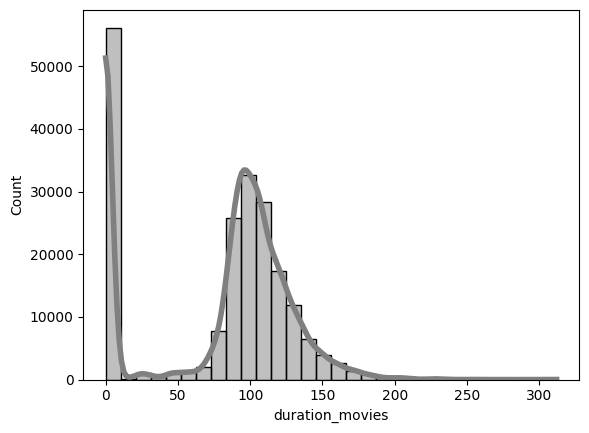

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

ax=sns.histplot(x=df_final['duration_movies'],kde=True,color='grey',
             bins=30)
for line in ax.lines:
    line.set_linewidth(4)

most of the movies are under the 112 minutes (aprox 30k). that is the most preferable time run for the movies.

In [54]:
df_final['duration_movies'].max()

312

numerical to categorical conversion to make it more efficient for analysis.

In [55]:
bins1=[-1,1,50,100,150,200,250,312]
labels1=['<1','1-50','50-100','100-150','150-200','200-250','250-312']
df_final['duration_movies']=pd.cut(df_final['duration_movies'],bins=bins1,labels=labels1)

In [56]:
# here we replacing the values where duration doesnot not contain tv shows duration replace it with the duration of movies
df_final['duration']=np.where( df_final['duration'].str.contains('Season',na=False),df_final['duration'],df_final['duration_movies'])
df_final

,title,Individual_actor,country,director,listed_in,show_id,type,date_added,release_year,rating,duration,duration_movies
0,Dick Johnson Is Dead,Unknown_actor,United States,Kirsten Johnson,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,50-100,50-100
1,Blood & Water,Ama Qamata,South Africa,Unknown_director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
2,Blood & Water,Ama Qamata,South Africa,Unknown_director,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
3,Blood & Water,Ama Qamata,South Africa,Unknown_director,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
4,Blood & Water,Khosi Ngema,South Africa,Unknown_director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,India,Mozez Singh,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,100-150,100-150
201987,Zubaan,Anita Shabdish,India,Mozez Singh,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,100-150,100-150
201988,Zubaan,Chittaranjan Tripathy,India,Mozez Singh,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,100-150,100-150
201989,Zubaan,Chittaranjan Tripathy,India,Mozez Singh,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,100-150,100-150


In [57]:
df_final['modified_date_added']=pd.to_datetime(df_final['date_added'].str.strip())
df_final['month']=df_final['modified_date_added'].dt.month
df_final['week']=df_final['modified_date_added'].dt.isocalendar().week
df_final['year']=df_final['modified_date_added'].dt.year
df_final.head()

,title,Individual_actor,country,director,listed_in,show_id,type,date_added,release_year,rating,duration,duration_movies,modified_date_added,month,week,year
0,Dick Johnson Is Dead,Unknown_actor,United States,Kirsten Johnson,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,50-100,50-100,2021-09-25,9,38,2021
1,Blood & Water,Ama Qamata,South Africa,Unknown_director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,South Africa,Unknown_director,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,South Africa,Unknown_director,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,South Africa,Unknown_director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9,38,2021


In [58]:
np.all(df_final['modified_date_added'].isnull())
#df_final['modified_date_added'].isnull().sum()

np.False_

# # univariate analysis on the basis of numerical and categorical values

In [59]:
df_final['year'].value_counts()
df_final[df_final['year']==2019]['month'].value_counts()
df_final[df_final['year']==2020]['month'].value_counts()

,count
month,
1,6139
4,4204
6,4190
10,4186
9,3971
5,3928
12,3844
11,3563
7,3363


In [60]:
df_final[df_final['year']==2020]['listed_in'].value_counts().reset_index()


,listed_in,count
0,Dramas,6202
1,International Movies,5829
2,Comedies,5226
3,International TV Shows,3121
4,Children & Family Movies,2921
5,Action & Adventure,2546
6,TV Dramas,2205
7,Independent Movies,1865
8,Romantic Movies,1755
9,Thrillers,1641


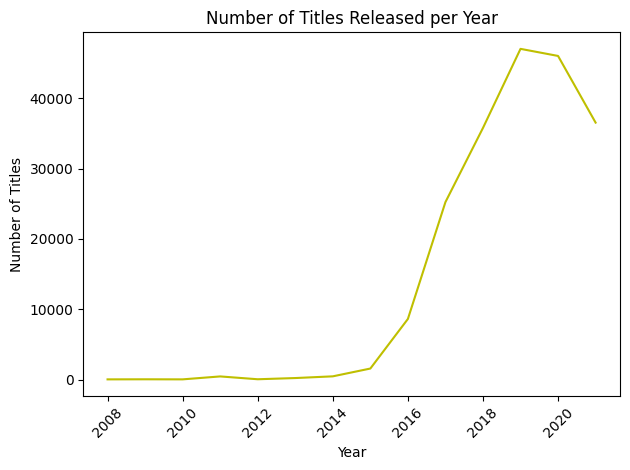

In [61]:
# Count number of titles per year
yearly_counts = df_final.groupby('year')['title'].count().reset_index()

sns.lineplot(data=yearly_counts, x='year', y='title',color='y')
plt.title('Number of Titles Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 # year 2019(especially in the month of oct,nov,dec) and 2020  has the most titles added to the netflix must be in high demand
# and most content was Dramas, international movies, comedies

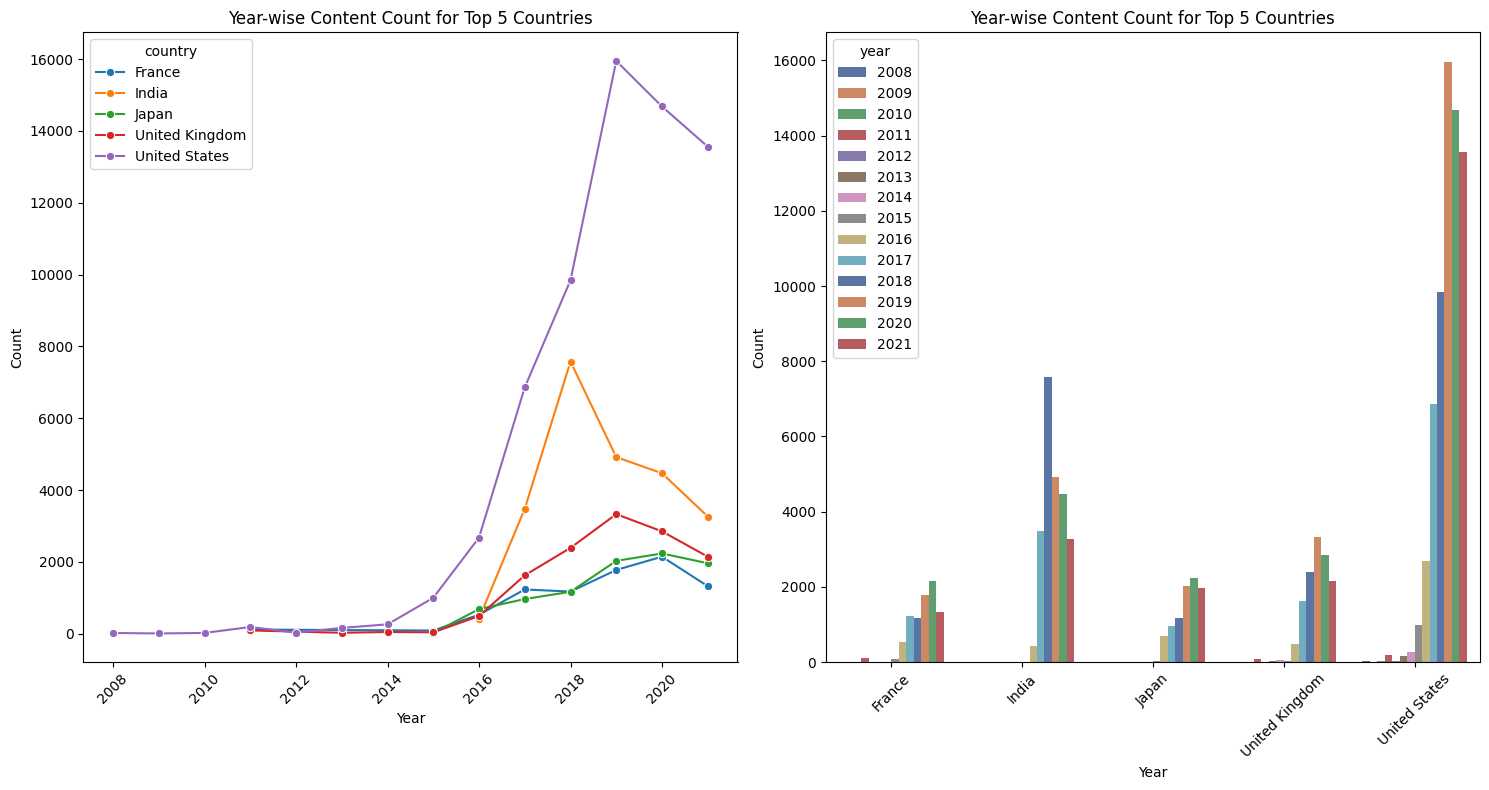

In [62]:
top_5_count=df_final['country'].value_counts().head(5).index
top_5_count=df_final[df_final['country'].isin(top_5_count)]
 # top_5_count.groupby(['country','year']).agg({'year':'count'})
top_5_count= top_5_count.groupby(['country', 'year']).size().reset_index(name='count')

plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
sns.lineplot(data=top_5_count, x='year', y='count', hue='country', marker='o')
plt.title('Year-wise Content Count for Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(data=top_5_count, x='country', y='count', hue='year',palette='deep')
plt.title('Year-wise Content Count for Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


there is quite declining in the Us and UK from the year 2019 must be hit by covid too and in india it is declining after 2018

In [63]:
# Safe way to handle even if df has 1 column
for dtype in pd.Series(df_final.dtypes).unique():
    cols = df_final.columns[df_final.dtypes == dtype].tolist()
    print(f"{dtype}: {cols}")


object: ['title', 'Individual_actor', 'country', 'director', 'listed_in', 'show_id', 'date_added', 'rating', 'duration']
category: ['type']
int64: ['release_year']
category: ['duration_movies']
datetime64[ns]: ['modified_date_added']
int32: ['month', 'year']
UInt32: ['week']


In [64]:
# for particular dtype like only want to check int and object
# import pandas as pd

def get_column_types(df):
    """
    Returns a dictionary of column names categorized by data types.

    Parameters:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        dict: Dictionary with keys like 'int', 'float', 'object', etc.,
              and values as lists of column names.
    """
    return {
        'int': df.select_dtypes(include='int').columns.tolist(),
#         'float': df.select_dtypes(include='float').columns.tolist(),
         'object': df.select_dtypes(include='object').columns.tolist(),
#         'bool': df.select_dtypes(include='bool').columns.tolist(),
#         'datetime': df.select_dtypes(include='datetime').columns.tolist(),
      'category': df.select_dtypes(include='category').columns.tolist(),
#         'other': df.select_dtypes(exclude=['int', 'float', 'object', 'bool', 'datetime', 'category']).columns.tolist()
    }
# df_final=df_final.apply(get_column_types) not working because no for loop
get_column_types(df_final)

{'int': ['release_year', 'month', 'year'],
 'object': ['title',
  'Individual_actor',
  'country',
  'director',
  'listed_in',
  'show_id',
  'date_added',
  'rating',
  'duration'],
 'category': ['type', 'duration_movies']}

In [65]:
df_final.rename(columns={'listed_in':'Genre'},inplace=True)
df_final


,title,Individual_actor,country,director,Genre,show_id,type,date_added,release_year,rating,duration,duration_movies,modified_date_added,month,week,year
0,Dick Johnson Is Dead,Unknown_actor,United States,Kirsten Johnson,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,50-100,50-100,2021-09-25,9,38,2021
1,Blood & Water,Ama Qamata,South Africa,Unknown_director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,South Africa,Unknown_director,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,South Africa,Unknown_director,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,South Africa,Unknown_director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9,38,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,India,Mozez Singh,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,100-150,100-150,2019-03-02,3,9,2019
201987,Zubaan,Anita Shabdish,India,Mozez Singh,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,100-150,100-150,2019-03-02,3,9,2019
201988,Zubaan,Chittaranjan Tripathy,India,Mozez Singh,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,100-150,100-150,2019-03-02,3,9,2019
201989,Zubaan,Chittaranjan Tripathy,India,Mozez Singh,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,100-150,100-150,2019-03-02,3,9,2019


In [66]:
df_genre=df_final.groupby('Genre').agg({'title':'nunique'}).sort_values(by='title',ascending=False).head(10).reset_index()
df_genre
# df_final.groupby('Genre')['title'].nunique().sort_values(ascending=False) also


,Genre,title
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


# international movies,Dramas, comedies and international tv shows are the most popular title coz added in huge demand and children and romantic movies are added in less number as compared

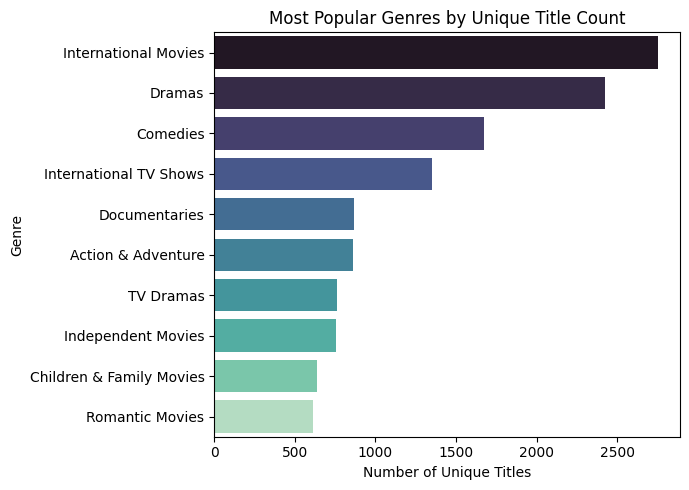

In [67]:
# countplot won't work which needs simple values_count on cat basis and genre titles
# Plot barplot with the number of unique titles per genre(cat-num case)
plt.figure(figsize=(7, 5))
sns.barplot(
    y='Genre',
    x='title',
    data=df_genre,
    palette='mako',
    hue='Genre'
)
plt.xlabel('Number of Unique Titles')
plt.ylabel('Genre')
plt.title('Most Popular Genres by Unique Title Count')
plt.tight_layout()
plt.show()

In [68]:
df_genre_Tv=df_final[df_final['type']=='TV Show'].groupby('Genre').agg({'title':'nunique'}).sort_values(by='title',ascending=False).head(10).reset_index()
df_genre_Tv

,Genre,title
0,International TV Shows,1351
1,TV Dramas,763
2,TV Comedies,581
3,Crime TV Shows,470
4,Kids' TV,451
5,Docuseries,395
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,253
9,Anime Series,176


In [69]:
#pd.reset_option('display.max_rows')
df_genre_movies=df_final[df_final['type']=='Movie'].groupby('Genre').agg({'title':'nunique'}).sort_values(by='title',ascending=False).head(10).reset_index()
df_genre_movies


,Genre,title
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859
5,Independent Movies,756
6,Children & Family Movies,641
7,Romantic Movies,616
8,Thrillers,577
9,Music & Musicals,375


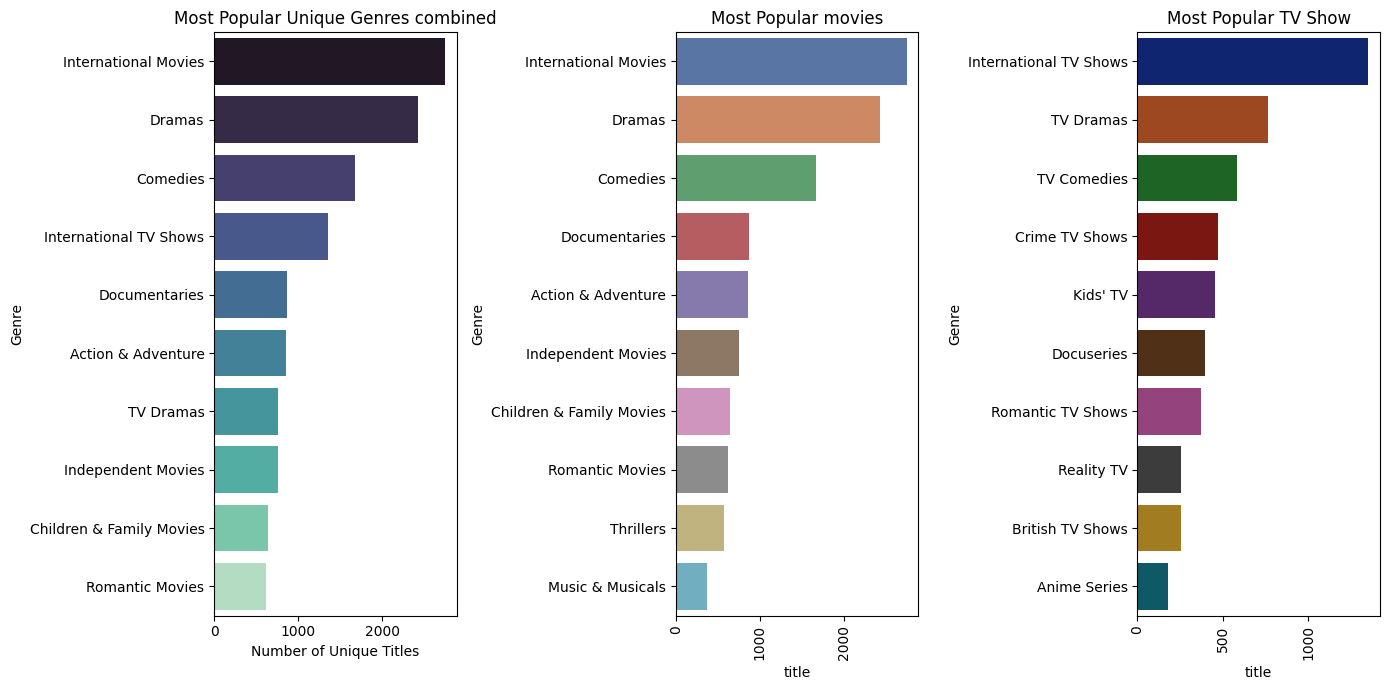

In [70]:
plt.figure(figsize=(14, 7))
plt.subplot(1,3,1)
sns.barplot(y='Genre',x='title',data=df_genre,palette='mako',hue='Genre')
plt.xlabel('Number of Unique Titles')
plt.ylabel('Genre')
plt.title('Most Popular Unique Genres combined')

plt.subplot(1,3,2)
sns.barplot(df_genre_movies,y='Genre',x='title',palette='deep',hue='Genre') # need to plot barplot coz for countplot need to create count_values.index for order
plt.xticks(rotation =90) # here frequency as numerical for barplot
plt.title('Most Popular movies')

plt.subplot(1,3,3)
sns.barplot(df_genre_Tv,y='Genre',x='title',palette='dark',hue='Genre') # need to plot barplot coz for countplot need to create count_values.index for order
plt.xticks(rotation =90) # here frequency as numerical for barplot
plt.title('Most Popular TV Show')

plt.tight_layout()
plt.show()

we can say that international movies  and tv shows are are on the top charts as followed by the dramas and comedies in both movies and tv shows, crime tv shows is quite popular in tv shows and in tv shows content for child is prefered while in movies where stuff for family&children is less.

In [71]:
# now we can see the category column type , in which proportion content on the netflix
df_final.groupby('type')['title'].nunique()

<ipython-input-71-76a8cd834b11>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final.groupby('type')['title'].nunique()


,title
type,
Movie,6131
TV Show,2676


<ipython-input-72-188d4a719b4d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  type_counts = df_final.groupby('type')['title'].nunique()


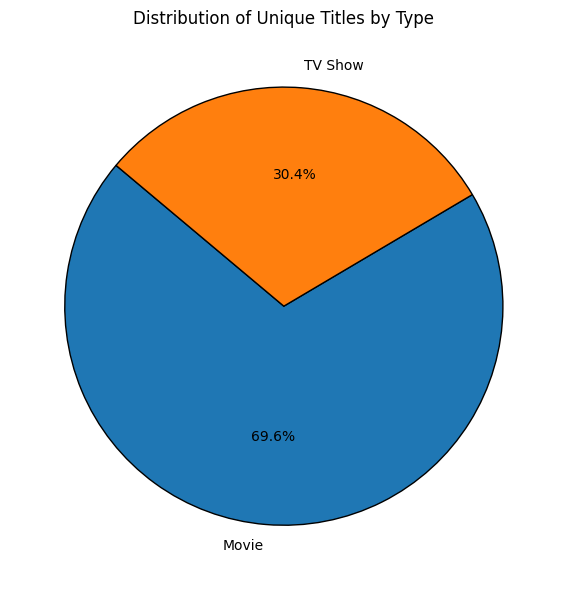

In [72]:
type_counts = df_final.groupby('type')['title'].nunique()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribution of Unique Titles by Type')
plt.tight_layout()
plt.show()


# so we can say that movie content is more in number so the audience may preffered to movies as it is approx 70% of the whole


In [73]:
count=df_final.groupby('country')['title'].nunique().sort_values(ascending=False)  # it cannot give us the sorting acc to country wise coz to apply sort_values according it must be a dtaframe
count=count.reset_index()  # to make this a dataframe
count.columns = ['country', 'count'] # now we can provide labels
count.sort_values(by='count',ascending=False)
# df_final1.groupby(['country']).agg({"title":"nunique"}) can use this can direct them by country wise coz both column indexing alrEADY DONE

# as we see all countries data there is , after them so we need to clean them before appling plot or visualisation

,country,count
0,United States,4248
1,India,1138
2,United Kingdom,829
3,Canada,460
4,France,409
...,...,...
123,Somalia,1
124,Sri Lanka,1
125,Uganda,1
126,Vatican City,1


In [74]:
df_final['country']=df_final['country'].str.replace(',','')

In [75]:
# now lets find out which country more productive in terms of  producing more movies and tv shows

df_final.groupby('country')['title'].nunique().sort_values(ascending=False)



,title
country,
United States,4249
India,1138
United Kingdom,831
Canada,460
France,409
...,...
Somalia,1
Samoa,1
Sudan,1


<ipython-input-76-9c35f2ef9fa3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


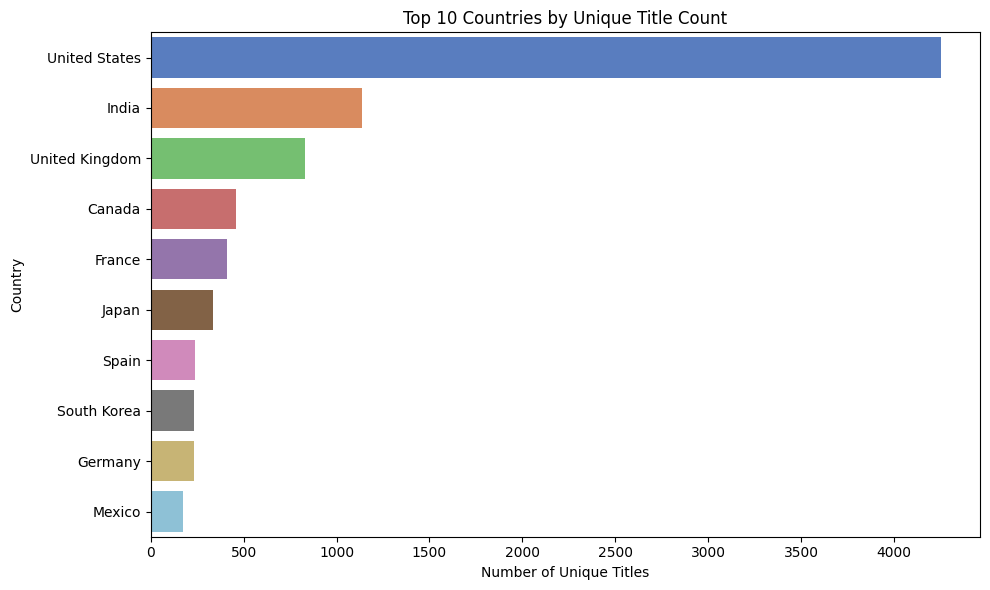

In [76]:
df_country=df_final.groupby('country')['title'].nunique().sort_values(ascending=False).head(10).reset_index() # Reset index so 'country' becomes a column
plt.figure(figsize=(10, 6))
sns.barplot(
    x='title',   # WE KNOW THAT HER TITLE IS NUMERICAL NO CATEGORICAL
    y='country',
    data=df_country,
    palette="muted"
)
plt.xlabel('Number of Unique Titles')
plt.ylabel('Country')
plt.title('Top 10 Countries by Unique Title Count')
plt.tight_layout()
plt.show()

# so it is obvious that UNITED STATES is most producitve in terms of producing followed by india, UK, Canada , France
UNITED STATES has huge gap interms of producing movies production must have share in economy as well.

In [77]:
df_country_movie=df_final[df_final['type']=='Movie'].groupby('country')['title'].nunique().sort_values(ascending=False).head(7).reset_index()
df_country_tv=df_final[df_final['type']=='TV Show'].groupby('country')['title'].nunique().sort_values(ascending=False).head(7).reset_index()

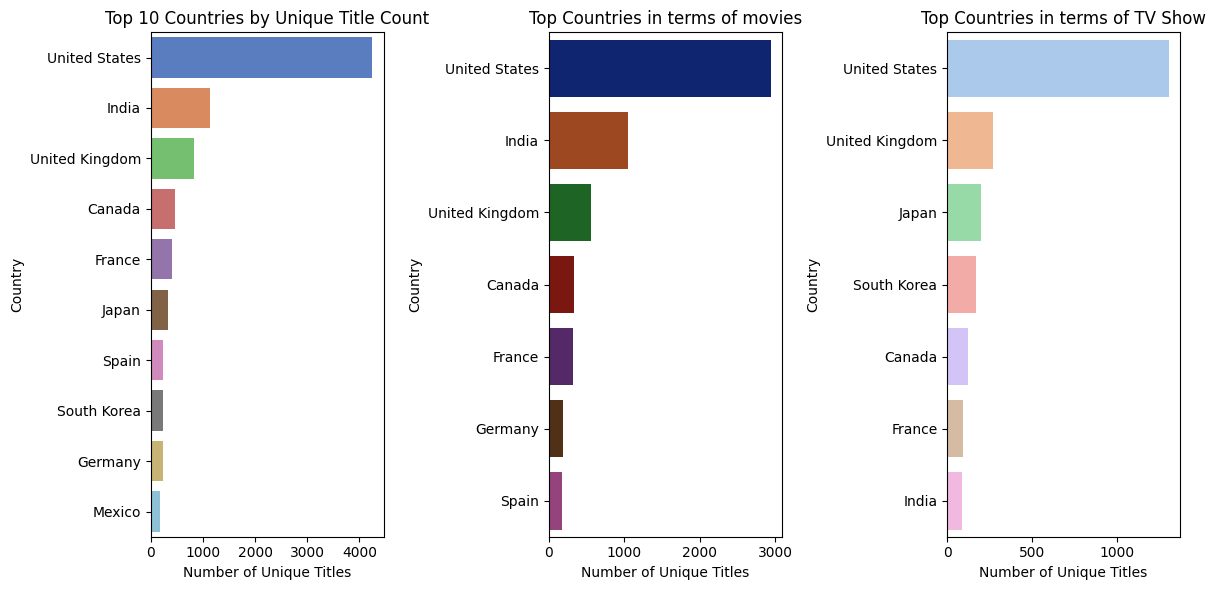

In [78]:
plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
sns.barplot( x='title',   y='country',data=df_country,palette="muted",hue='country')# WE KNOW THAT HER TITLE IS NUMERICAL NO CATEGORICAL
plt.xlabel('Number of Unique Titles')
plt.ylabel('Country')
plt.title('Top 10 Countries by Unique Title Count')

plt.subplot(1,3,2)
sns.barplot( x='title',   y='country',data=df_country_movie,palette="dark",hue='country')# WE KNOW THAT HER TITLE IS NUMERICAL NO CATEGORICAL
plt.xlabel('Number of Unique Titles')
plt.ylabel('Country')
plt.title('Top Countries in terms of movies')

plt.subplot(1,3,3)
sns.barplot( x='title',   y='country',data=df_country_tv,palette="pastel",hue='country')# WE KNOW THAT HER TITLE IS NUMERICAL NO CATEGORICAL
plt.xlabel('Number of Unique Titles')
plt.ylabel('Country')
plt.title('Top Countries in terms of TV Show')
plt.tight_layout()

plt.show()


we can say tht united states,India, UK leading here in all the segment india is runner up interms of producing movies while UK in TVShows
Japan  and korean shows here is unexpected winner in TV Shows which was not polpular ealrier in this industry


In [79]:
# now let's take the column rating for analysis
df_final.groupby('rating')['title'].agg('nunique')
# or
df_rating=df_final.groupby('rating').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False).head(10) # for top 10

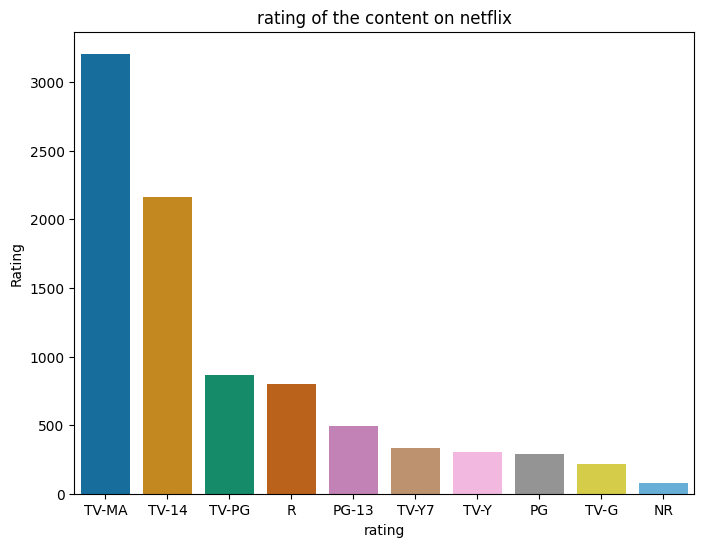

In [80]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_rating['rating'],y=df_rating['title'],palette="colorblind",hue=df_rating['rating'])
plt.title('rating of the content on netflix')
plt.ylabel('Rating',fontsize=10)
plt.show()


most content which is highly watched is matured audience and after it follows by tv-14 and tv-pg for teens and adults which required parents guidance
but for movies R-rating is the most highest.


In [81]:
df_rating_movie=df_final[df_final['type']=="Movie"].groupby('rating').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False).head(5)
df_rating_tv=df_final[df_final['type']=="TV Show"].groupby('rating').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False).head(5)

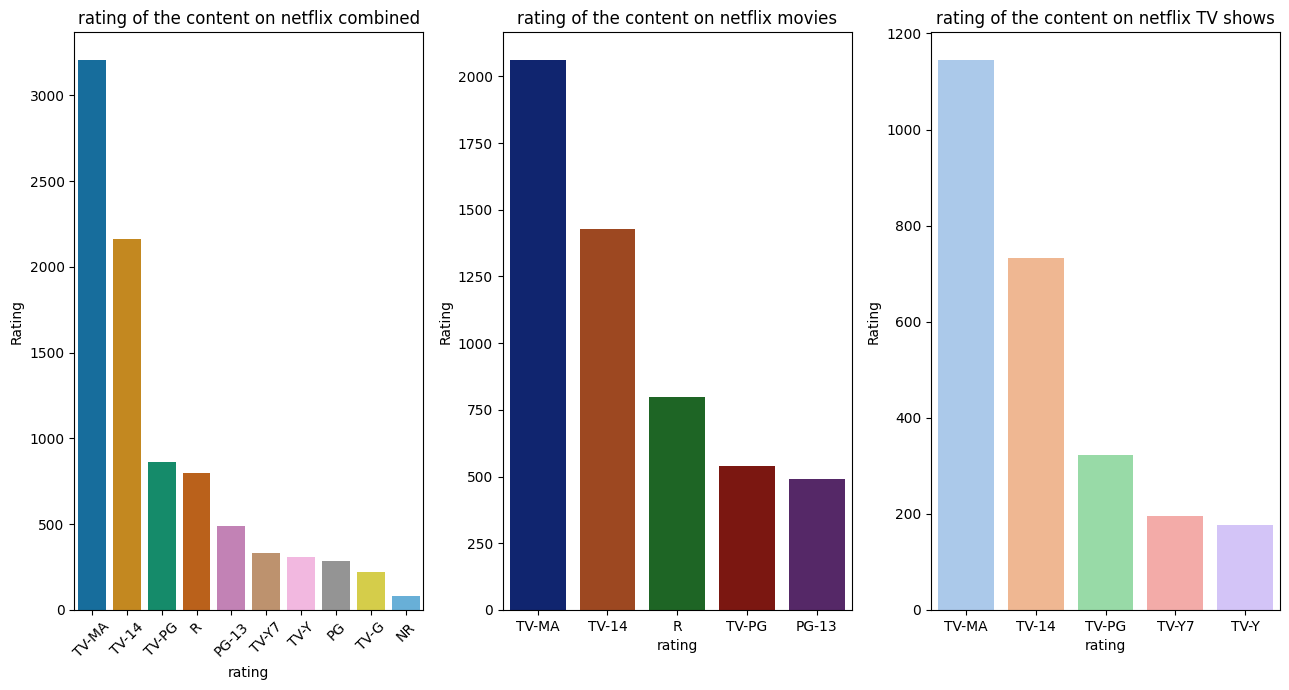

In [82]:
plt.figure(figsize=(13,7))
plt.subplot(1,3,1)
sns.barplot(x=df_rating['rating'],y=df_rating['title'],palette="colorblind",hue=df_rating['rating'])
plt.xticks(rotation=45)
plt.title('rating of the content on netflix combined')
plt.ylabel('Rating',fontsize=10)

plt.subplot(1,3,2)
sns.barplot(x=df_rating_movie['rating'],y=df_rating_movie['title'],palette="dark",hue=df_rating_movie['rating'])
plt.title('rating of the content on netflix movies')
plt.ylabel('Rating',fontsize=10)

plt.subplot(1,3,3)
sns.barplot(x=df_rating_tv['rating'],y=df_rating_tv['title'],palette="pastel",hue=df_rating_tv['rating'])
plt.title('rating of the content on netflix TV shows')
plt.ylabel('Rating',fontsize=10)

plt.tight_layout()
plt.show()

most content which is highly watched is matured audience in all  and after it follows by tv-14 and tv-pg for teens and adults which required parents guidance
but for movies R-rating is the most highest.

In [83]:
# df_rating_country=df_final['country']==['United States','India','United Kingdom','Canada',	'France'].groupby('rating').agg({'country':'unique'}).reset_index().sort_values(by='title',ascending=False).head(10)
top_5_count= df_final.groupby('country')['title'].nunique().sort_values(ascending=False).head(5).index
top_5_count=df_final[df_final['country'].isin(top_5_count)]

rating_counts = top_5_count.groupby(['country', 'rating']).size().reset_index(name='count')
rating_counts_sorted = rating_counts.sort_values(by=['country', 'count'], ascending=[False, False])
top_5_ratings_by_country = rating_counts_sorted.groupby('country').head(5).reset_index(drop=True)
top_5_ratings_by_country



,country,rating,count
0,United States,TV-MA,17337
1,United States,R,13554
2,United States,PG-13,9212
3,United States,TV-14,7818
4,United States,PG,6066
5,United Kingdom,TV-MA,4397
6,United Kingdom,R,3063
7,United Kingdom,PG-13,1755
8,United Kingdom,TV-14,959
9,United Kingdom,TV-PG,924


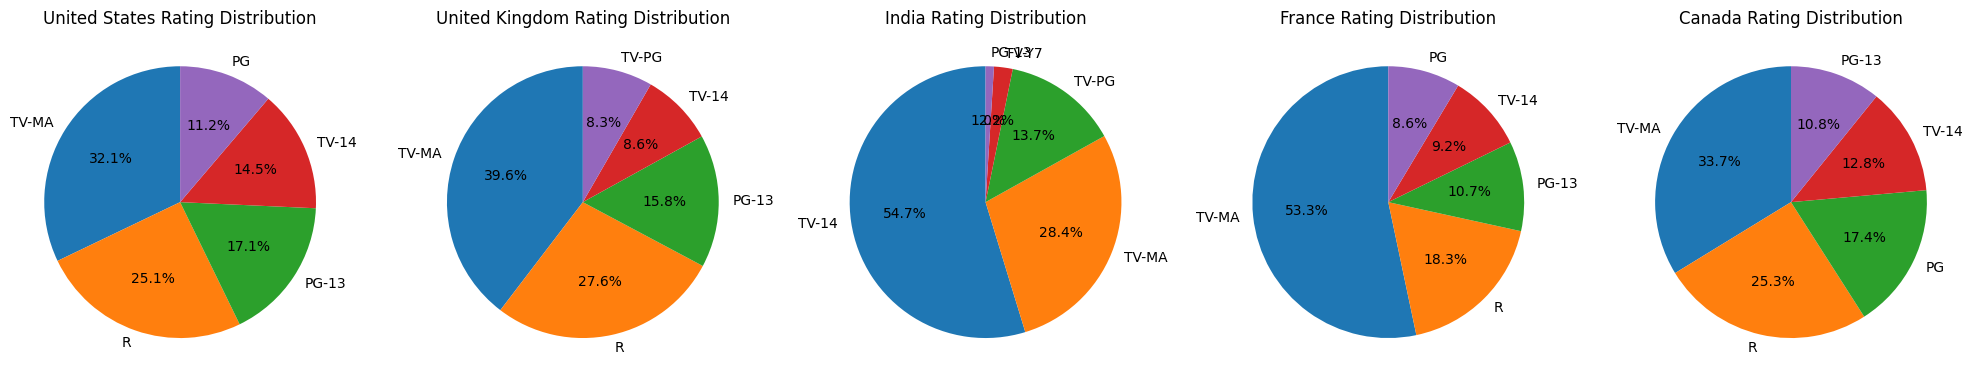

In [84]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6))  # Create 1 row, 5 columns of pie charts

for i, country in enumerate(top_5_ratings_by_country['country'].unique()):
    country_data = top_5_ratings_by_country[top_5_ratings_by_country['country'] == country]
    axes[i].pie(country_data['count'], labels=country_data['rating'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{country} Rating Distribution')

# Display the pie charts
plt.tight_layout()
plt.show()

TV-MA is the most watched content across the globe except India which is tv-14 inlclined , so can say that audience likes the maturity and R- rated content the most.

In [85]:
# duration column which consist of both tv shows and movies
df_duration_tv=df_final[df_final['duration'].str.contains('Season')].groupby('duration').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
df_duration_tv

,duration,title
0,1 Season,1793
7,2 Seasons,425
8,3 Seasons,199
9,4 Seasons,95
10,5 Seasons,65
11,6 Seasons,33
12,7 Seasons,23
13,8 Seasons,17
14,9 Seasons,9
1,10 Seasons,7


<ipython-input-86-e0aaaf1eb90a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_duration_tv,y='duration',x='title',palette='magma')


Text(0, 0.5, 'season of tv shows')

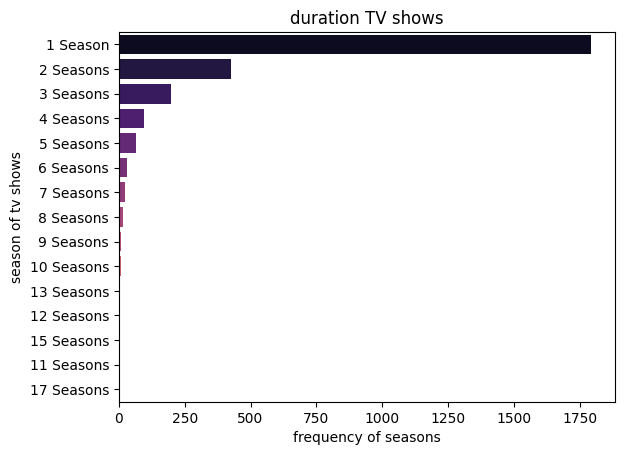

In [86]:
sns.barplot(data=df_duration_tv,y='duration',x='title',palette='magma')
plt.title('duration TV shows')
plt.xlabel('frequency of seasons')
plt.ylabel('season of tv shows')

i can say that most tv seasons concluded after season 5 and which still continued must be supported by audience views and interest

In [87]:
tv_shows= df_final[df_final['type']=='TV Show'].copy()
tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)
tv_shows_gt_10=tv_shows[tv_shows['num_seasons']>10]
tv_shows_gt_10['title'].unique()


array(["Grey's Anatomy", 'Heartland', 'Supernatural',
       'COMEDIANS of the world', 'NCIS', 'Trailer Park Boys',
       'Criminal Minds', 'Cheers', 'Frasier', 'Red vs. Blue'],
      dtype=object)

In [88]:
tv_shows_gt_10[['title','Genre']]
tv_shows_gt_10.groupby('title').agg({'Genre':'unique'})
# if want to explode the list so can use expolode() to make unnested data in genre with str.split(",") like did on the unstack at the ealriest dfs

,Genre
title,
COMEDIANS of the world,"[Stand-Up Comedy & Talk Shows, TV Comedies]"
Cheers,"[Classic & Cult TV, TV Comedies]"
Criminal Minds,"[Crime TV Shows, TV Dramas, TV Mysteries]"
Frasier,"[Classic & Cult TV, TV Comedies]"
Grey's Anatomy,"[Romantic TV Shows, TV Dramas]"
Heartland,[TV Dramas]
NCIS,"[Crime TV Shows, TV Dramas, TV Mysteries]"
Red vs. Blue,"[TV Action & Adventure, TV Comedies, TV Sci-Fi..."
Supernatural,"[Classic & Cult TV, TV Action & Adventure, TV ..."


'Greys Anatomy', 'Heartland', 'Supernatural',
       'Comedians Of The World', 'Ncis', 'Trailer Park Boys',
       'Criminal Minds', 'Cheers', 'Frasier', 'Red Vs Blue']
       these are the tv shows which are which continued after season 10 must be popular and fascinating genre it comprises are classic & cult , tv comedies, crime tv shows , tv dramas, tv science, that genre audience  wants to see them that they should never ending feeling.
       

In [89]:
df_duration_movies=df_final[df_final['duration'].str.contains('-')].groupby('duration').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)
df_duration_movies

,duration,title
5,50-100,3030
1,100-150,2569
0,1-50,287
2,150-200,226
3,200-250,16
4,250-312,3


In [90]:
df_duration_movies_ctry=df_final[df_final['duration'].str.contains('-')].groupby('duration').agg({'country':['unique','count']}).reset_index()
pd.set_option('display.max_colwidth', None) # to see the complete list
df_duration_movies_ctry


duration  \
             
0     1-50   
1  100-150   
2  150-200   
3  200-250   
4  250-312   
5   50-100   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      country  \
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       unique   
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     [United States, Unknown_country, India, South Korea, Lebanon, Syria, Mexico, Egypt, Nigeria, United Kingdom, Canada, Spain, Namibia, Kenya, South Africa, France, Japan, Germany, Pakistan, Poland, Sweden, Netherlands, Ireland, Georgia, Argentina, Greece, Denmark, China, Australia, Italy, Brazil]   
1                                                    [United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia, Czech Republic, India, France, Unknown_country, Belgium, South Africa, Japan, Nigeria, Canada, Australia, Mexico, Italy, China, Hong Kong, Taiwan, Philippines, New Zealand, Brazil, Greece, Switzerland, Argentina, Spain, , Algeria, Turkey, Israel, Denmark, Thailand, Indonesia, Kuwait, Egypt, Malaysia, South Korea, Vietnam, Hungary, Lebanon, Romania, Sweden, Finland, Netherlands, Cameroon, Poland, Ireland, Russia, Chile, Colombia, Cambodia, Bangladesh, Portugal, Norway, Iceland, Singapore, Serbia, Malta, Kenya, Saudi Arabia, Bulgaria, Angola, Peru, Mozambique, United Arab Emirates, Jordan, Senegal, Luxembourg, Pakistan, Austria, Malawi, Paraguay, Uruguay, Iran, Albania, Qatar, Soviet Union, Georgia, Morocco, Slovakia, West Germany, Armenia, Mongolia, Bahamas, Latvia, Venezuela, Nicaragua, Nepal, Jamaica, Somalia, Sudan, Nam

In [91]:
top3_countries = (df_final[df_final['duration'].str.contains('-')].explode('country').groupby(['duration', 'country']).size().reset_index(name='count').sort_values(['duration', 'count'], ascending=[True, False]).groupby('duration').head(3).reset_index(drop=True))
print(top3_countries)


   duration         country  count
0      1-50   United States   1678
1      1-50          Canada    221
2      1-50  United Kingdom    146
3   100-150   United States  19658
4   100-150           India  15771
5   100-150  United Kingdom   4701
6   150-200           India   3964
7   150-200   United States    980
8   150-200  United Kingdom    247
9   200-250           India    131
10  200-250   United States    102
11  200-250  United Kingdom     68
12  250-312   United States     22
13  250-312           Egypt     21
14   50-100   United States  24488
15   50-100          Canada   3529
16   50-100  United Kingdom   3493


<ipython-input-92-35990f29eee5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='duration', y='count', data=top3_countries,palette='dark')


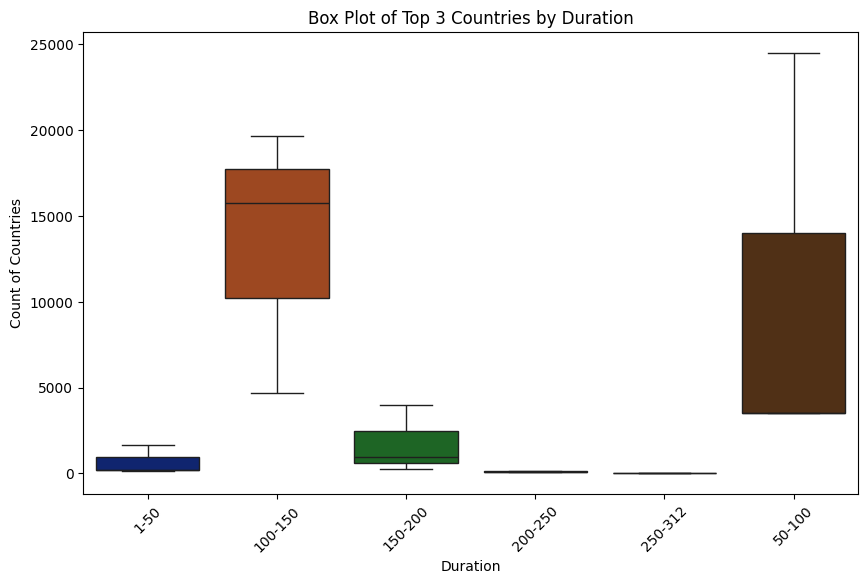

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='duration', y='count', data=top3_countries,palette='dark')
plt.title('Box Plot of Top 3 Countries by Duration')
plt.xlabel('Duration')
plt.ylabel('Count of Countries')
plt.xticks(rotation=45)
plt.show()

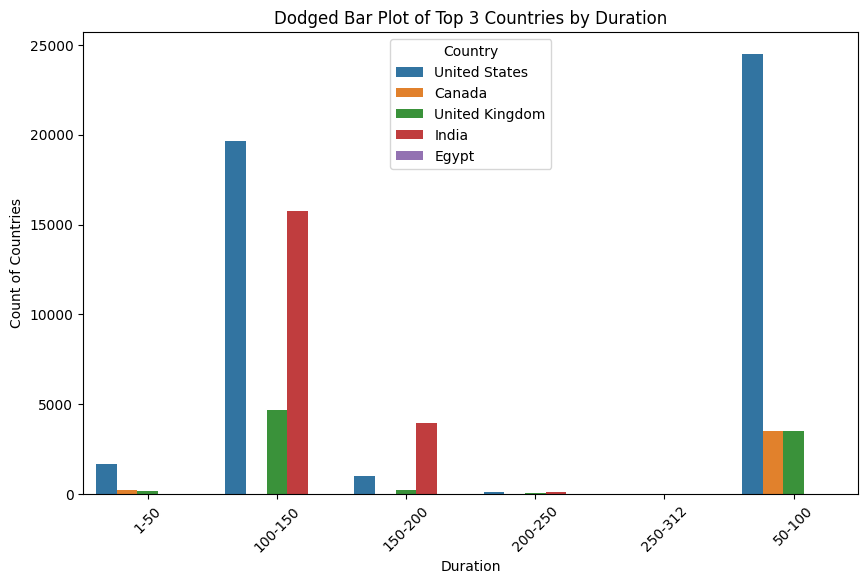

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(x='duration', y='count', hue='country', data=top3_countries, dodge=True)
plt.title('Dodged Bar Plot of Top 3 Countries by Duration')
plt.xlabel('Duration')
plt.ylabel('Count of Countries')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()

united states prodcing highest titles in almost every segment of duration of movies while and india mostly in 150-200 and 200-250 segment which between 2 too 3.5 hr movie segment.

Text(0, 0.5, 'frequency')

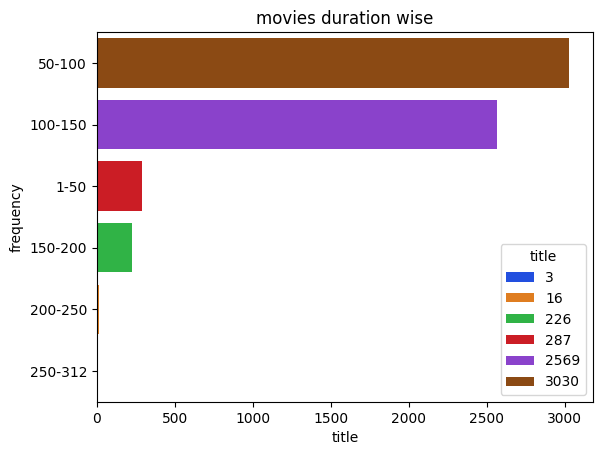

In [94]:
sns.barplot(data=df_duration_movies,x='title',y='duration',palette='bright',hue='title')
plt.title('movies duration wise')
plt.ylabel('frequency')

most of the movies are in the range of 50-100 or 100-150 minutes that must be most standard time for most movies and must be the director's choice as well


In [95]:
# we can do on actors now
df_actors=df_final[df_final['Individual_actor']!='Unknown_actor'].groupby('Individual_actor').agg({'title':'nunique'}).reset_index()
df_actors=df_actors.sort_values(by='title',ascending=False).head(20)
df_actors

,Individual_actor,title
2833,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
24215,Naseeruddin Shah,32
32591,Takahiro Sakurai,32
28974,Rupa Bhimani,31
846,Akshay Kumar,30
25424,Om Puri,30
35880,Yuki Kaji,29
1774,Amitabh Bachchan,28


<Axes: xlabel='title', ylabel='Individual_actor'>

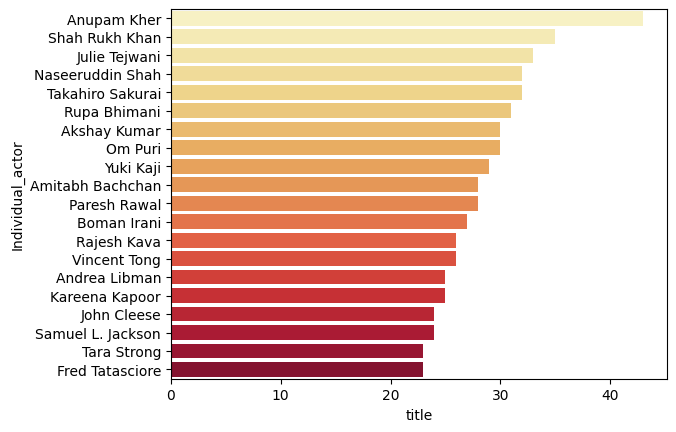

In [96]:
sns.barplot(data=df_actors,x='title',y='Individual_actor',hue='Individual_actor', palette='YlOrRd')

# Aumpam Kher has been the most active actors in terms of number of movies follwed by Shahrukh khan, julie Tejawani and Naseeruddin Shah but we can't say that doing more movies is tantamount to Best actor also.but we can conclude he must be director's choice who wants to work with that actor.

In [97]:
#pd.reset_option("display.max_rows")
df_actors_movie=df_final[(df_final['Individual_actor']!='Unknown_actor')& (df_final['type']== 'Movie')].groupby('Individual_actor').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False).head(15)
df_actors_TV=df_final[(df_final['Individual_actor']!='Unknown_actor')& (df_final['type']== 'TV Show')].groupby('Individual_actor').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False).head(15)


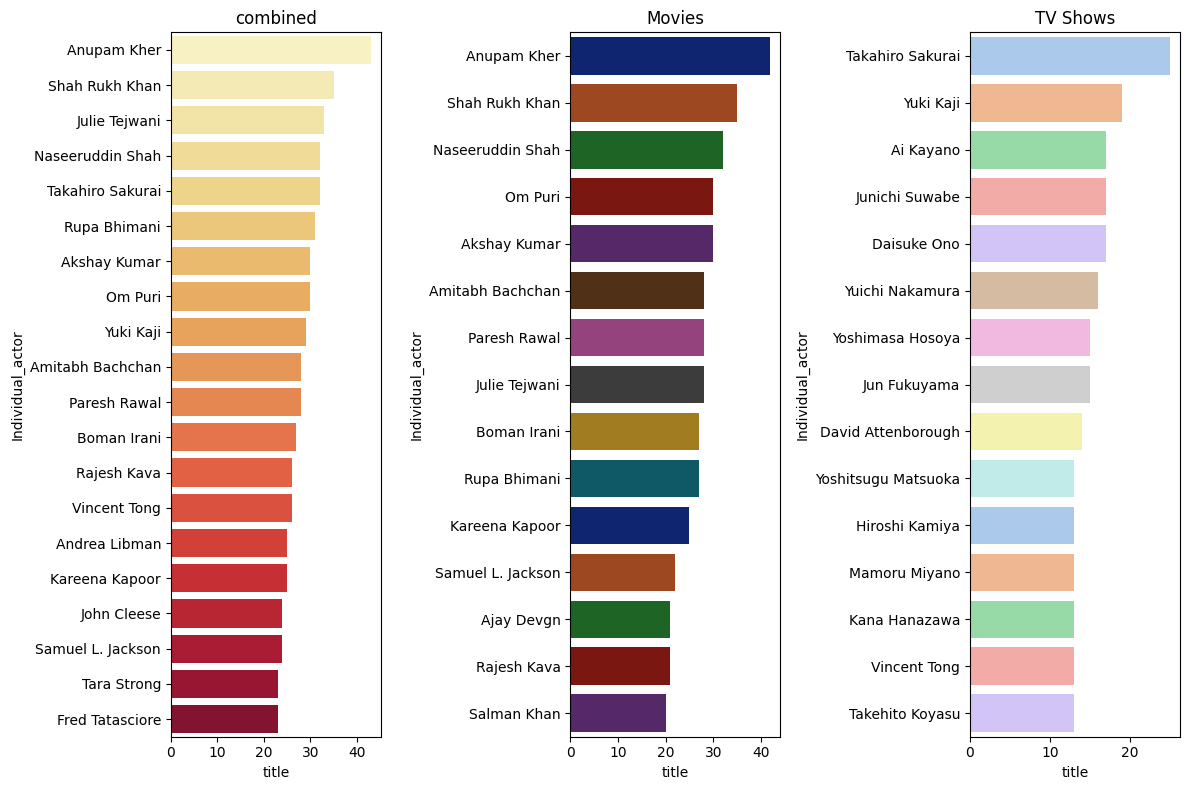

In [98]:
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
sns.barplot(data=df_actors,x='title',y='Individual_actor',hue='Individual_actor', palette='YlOrRd')
plt.title('combined')

plt.subplot(1,3,2)
sns.barplot(data=df_actors_movie,x='title',y='Individual_actor',hue='Individual_actor', palette='dark')
plt.title('Movies')

plt.subplot(1,3,3)
sns.barplot(data=df_actors_TV,x='title',y='Individual_actor',hue='Individual_actor', palette='pastel')
plt.title('TV Shows')

plt.tight_layout()
plt.show()

# Aumpam Kher has been the most active actors in terms of number of movies follwed by Shahrukh khan, julie Tejawani and Naseeruddin Shah, but in tv show scenario is different Takahiro Sakurai, yuki kaji and Junichi Suwabe dominating the tv industry.

In [99]:
# let's find the director with whom these actors worked with
director_actor_title=df_final[df_final['Individual_actor'].isin(['Anupam Kher', 'Shah Rukh Khan','Julie Tejwani','Naseeruddin Shah'	,'Takahiro Sakurai'])].groupby(['Individual_actor','director'])['title'].nunique()




In [100]:
director_actor_title= df_final[df_final['Individual_actor'].isin(['Anupam Kher', 'Shah Rukh Khan','Julie Tejwani','Naseeruddin Shah'	,'Takahiro Sakurai'])][['Individual_actor', 'director', 'title']].drop_duplicates()
director_actor_title=director_actor_title.groupby(['Individual_actor','director'])['title'].apply(list).reset_index()
director_actor_title


,Individual_actor,director,title
0,Anupam Kher,Abhinay Deo,[Game]
1,Anupam Kher,Abhishek Sharma,[The Shaukeens]
2,Anupam Kher,Amaan Khan,[Mahabharat]
3,Anupam Kher,Amol Palekar,[Paheli]
4,Anupam Kher,Ashok Nanda,[One Day: Justice Delivered]
...,...,...,...
96,Takahiro Sakurai,Hiroyuki Seshita,"[GODZILLA The Planet Eater, GODZILLA City on the Edge of Battle, Godzilla, BLAME!]"
97,Takahiro Sakurai,Kobun Shizuno,"[GODZILLA The Planet Eater, GODZILLA City on the Edge of Battle, Godzilla]"
98,Takahiro Sakurai,Nobuyuki Takeuchi,[Fireworks]
99,Takahiro Sakurai,Toshiyuki Kubooka,"[Berserk: The Golden Age Arc II - The Battle for Doldrey, Berserk: The Golden Age Arc III - The Advent, Berserk: The Golden Age Arc I - The Egg of the King]"


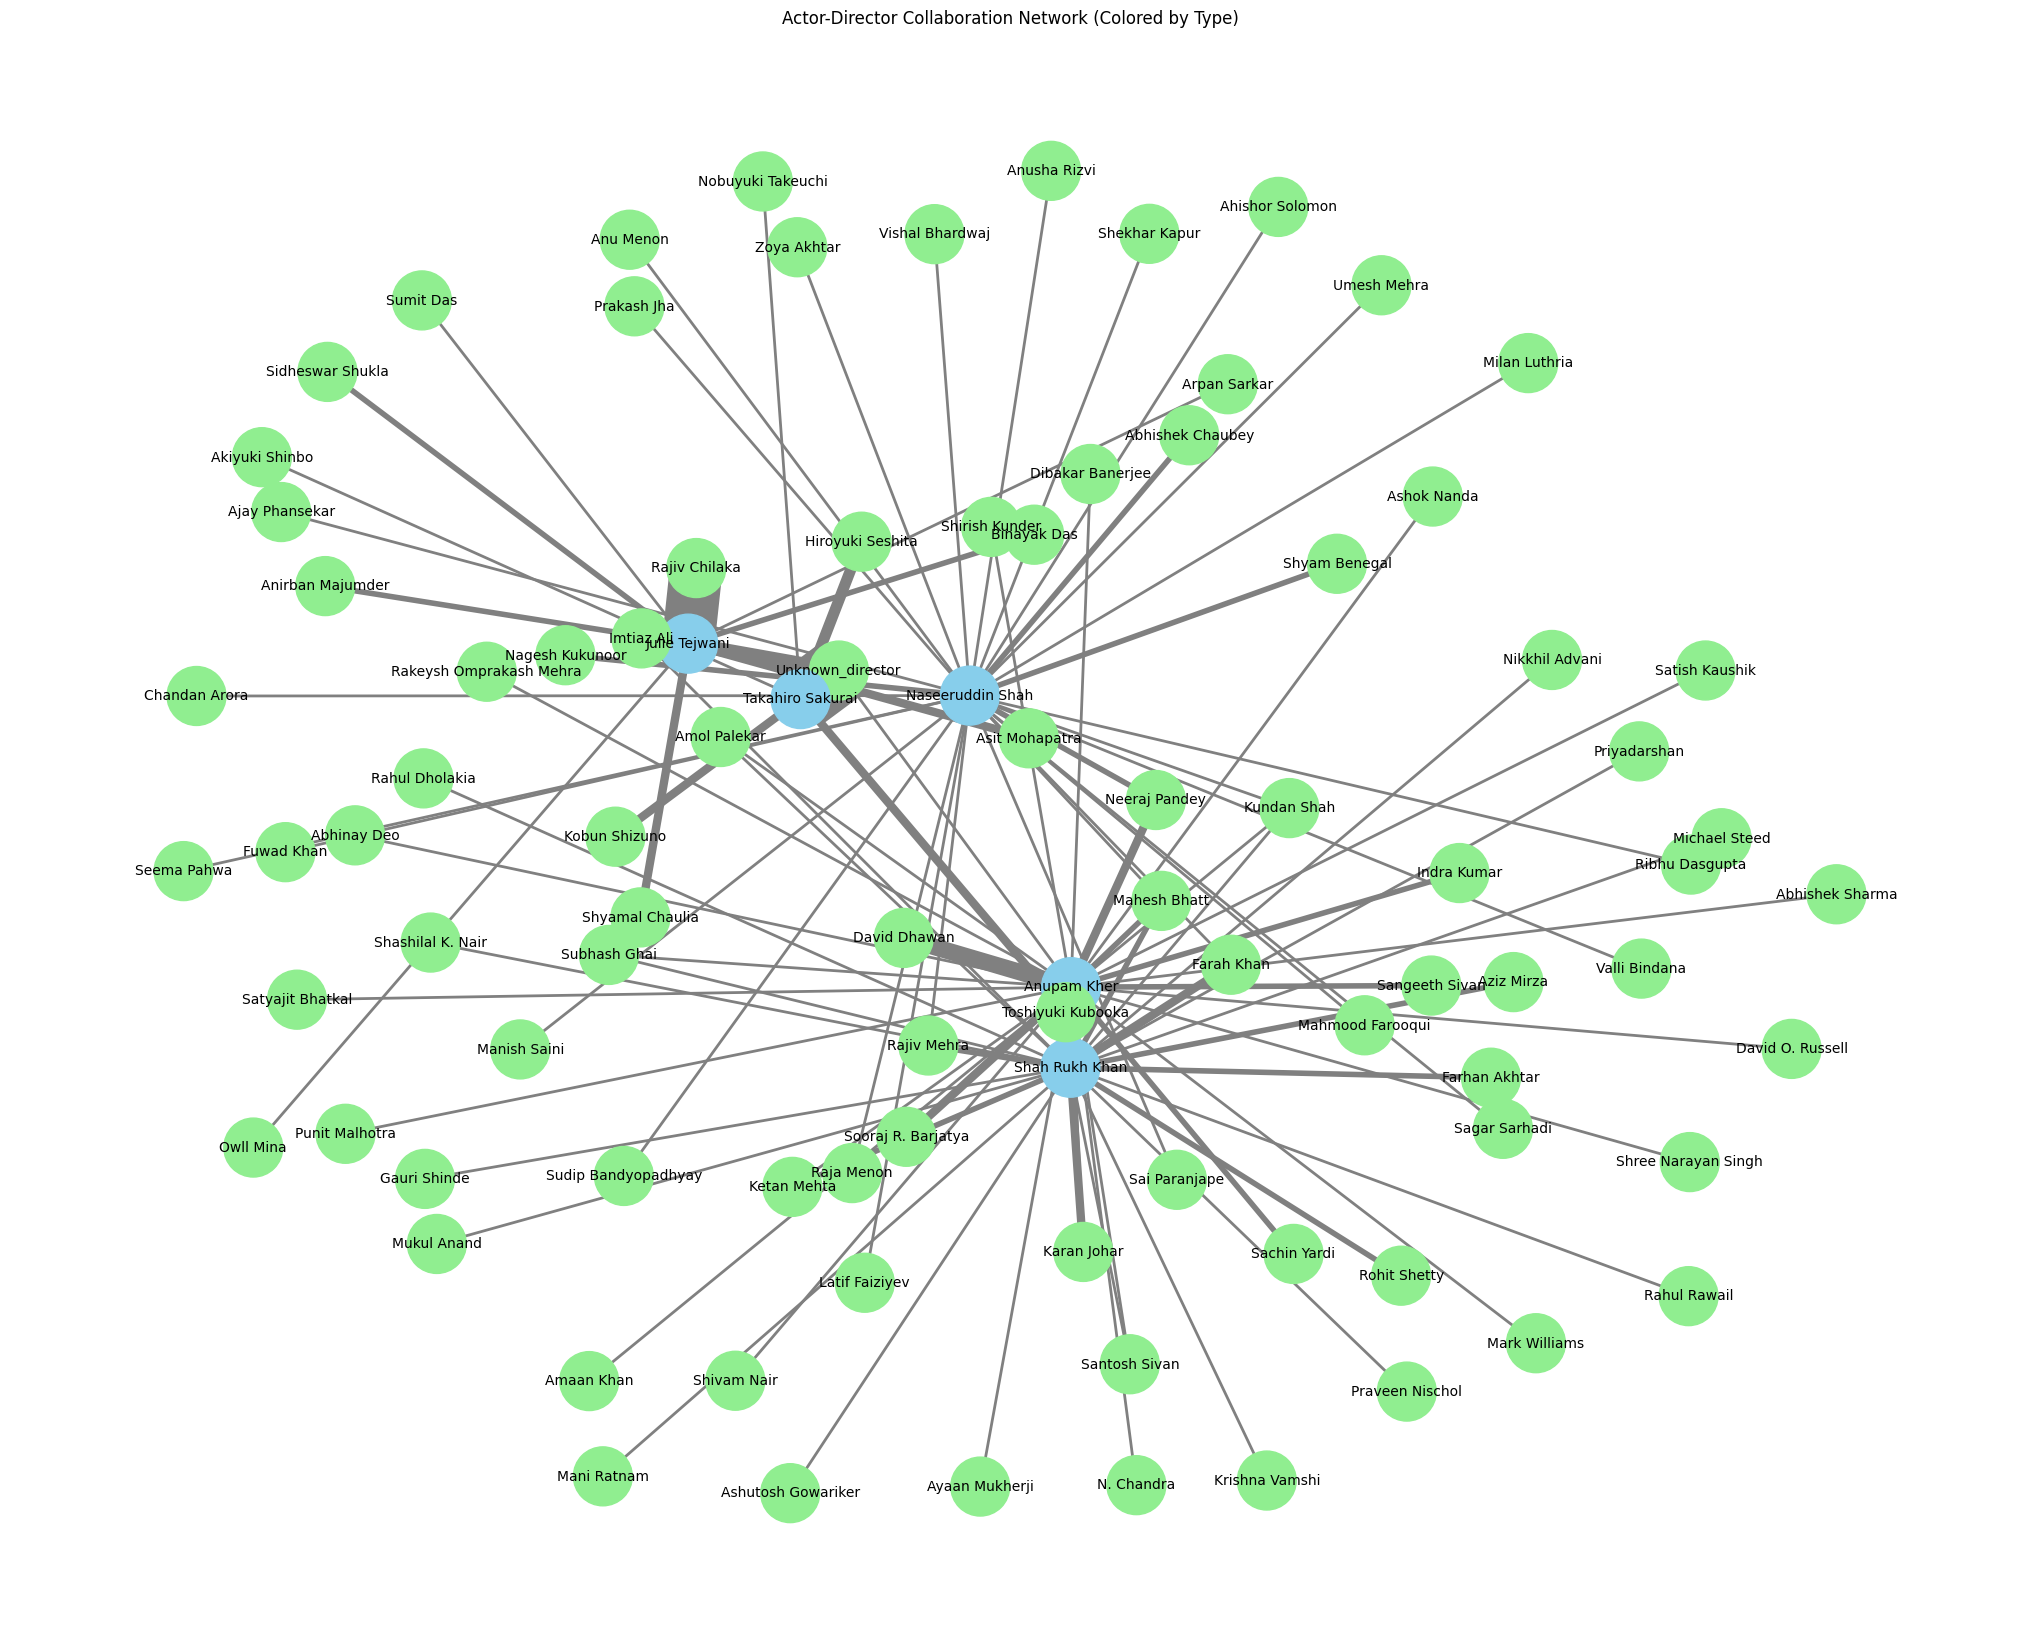

In [101]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Filter and group data
actor_list = ['Anupam Kher', 'Shah Rukh Khan', 'Julie Tejwani', 'Naseeruddin Shah', 'Takahiro Sakurai']
filtered_df = df_final[df_final['Individual_actor'].isin(actor_list)][['Individual_actor', 'director', 'title']].drop_duplicates()
grouped = filtered_df.groupby(['Individual_actor', 'director'])['title'].nunique().reset_index(name='title_count')

# Step 2: Build graph
G = nx.Graph()

for _, row in grouped.iterrows():
    actor = row['Individual_actor']
    director = row['director']
    count = row['title_count']
    G.add_node(actor, type='actor')
    G.add_node(director, type='director')
    G.add_edge(actor, director, weight=count)

# Step 3: Assign colors
node_colors = []
for node in G.nodes(data=True):
    if node[1]['type'] == 'actor':
        node_colors.append('skyblue')
    else:
        node_colors.append('lightgreen')

# Step 4: Draw graph
plt.figure(figsize=(20, 16))
pos = nx.spring_layout(G, k=0.6)

edges = G.edges(data=True)
weights = [d['weight'] * 2 for (_, _, d) in edges]  # scale line thickness by weight

nx.draw(
    G, pos, with_labels=True, node_color=node_colors,
    edge_color='gray', width=weights, node_size=1800, font_size=10
)

plt.title("Actor-Director Collaboration Network (Colored by Type)")
plt.axis('off')
plt.show()


In [102]:
#pd.reset_option("display.max_rows")
from datetime import datetime
current_year = datetime.now().year
last_5_years = current_year - 5
df_actors_5=df_final[(df_final['Individual_actor']!='Unknown_actor') & (df_final['year'] >= last_5_years)].groupby('Individual_actor').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False).head(15)

df_actors_movie_5=df_final[(df_final['Individual_actor']!='Unknown_actor')& (df_final['type']== 'Movie') & (df_final['year'] >= last_5_years)].groupby('Individual_actor').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False).head(15)
df_actors_TV_5=df_final[(df_final['Individual_actor']!='Unknown_actor')& (df_final['type']== 'TV Show') & (df_final['year'] >= last_5_years)].groupby('Individual_actor').agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False).head(15)
df_actors_5


,Individual_actor,title
14115,Rajesh Kava,24
8559,Julie Tejwani,24
7833,Jigna Bhardwaj,22
14963,Rupa Bhimani,22
17690,Vatsal Dubey,17
5521,Fortune Feimster,16
2263,Blossom Chukwujekwu,15
1482,Anupam Kher,15
12325,Mousam,14
16630,Swapnil,14


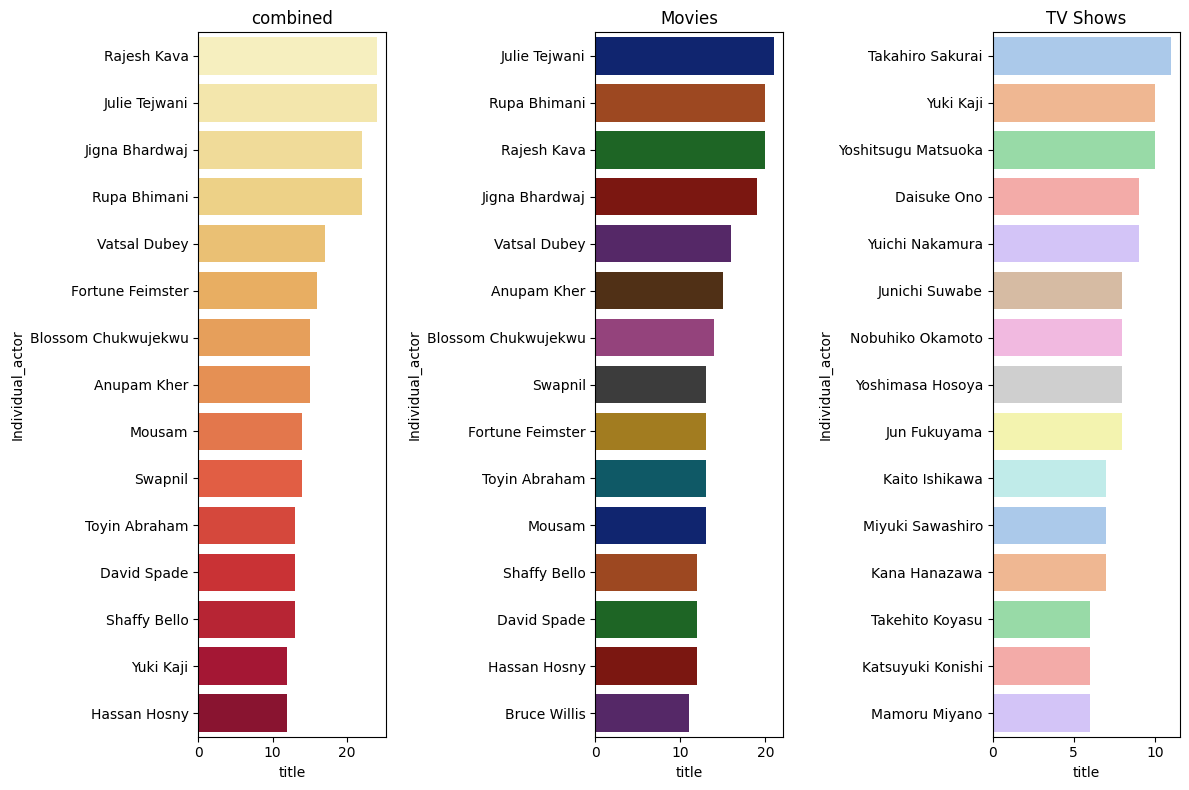

In [103]:
# actors datat on the last five years to test who is most popular in the recent time
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
sns.barplot(data=df_actors_5,x='title',y='Individual_actor',hue='Individual_actor', palette='YlOrRd')
plt.title('combined')

plt.subplot(1,3,2)
sns.barplot(data=df_actors_movie_5,x='title',y='Individual_actor',hue='Individual_actor', palette='dark')
plt.title('Movies')

plt.subplot(1,3,3)
sns.barplot(data=df_actors_TV_5,x='title',y='Individual_actor',hue='Individual_actor', palette='pastel')
plt.title('TV Shows')

plt.tight_layout()
plt.show()

the names i see in this data julie tejwani, rajesh kava and jigna bhardwaj they are the voice actors of the anime and cartoons it means i should test the data in this genre too.

In [104]:
# now the most important one is the director
df_directors= df_final[df_final['director']!='Unknown_director'].groupby('director').agg({'title': 'nunique'}).reset_index()
df_directors=df_directors.sort_values(by='title',ascending=False).head(20)
df_directors


,director,title
3749,Rajiv Chilaka,22
1906,Jan Suter,21
3800,Raúl Campos,19
2866,Marcus Raboy,16
4457,Suhas Kadav,16
1954,Jay Karas,15
755,Cathy Garcia-Molina,13
2945,Martin Scorsese,12
4941,Youssef Chahine,12
1951,Jay Chapman,12


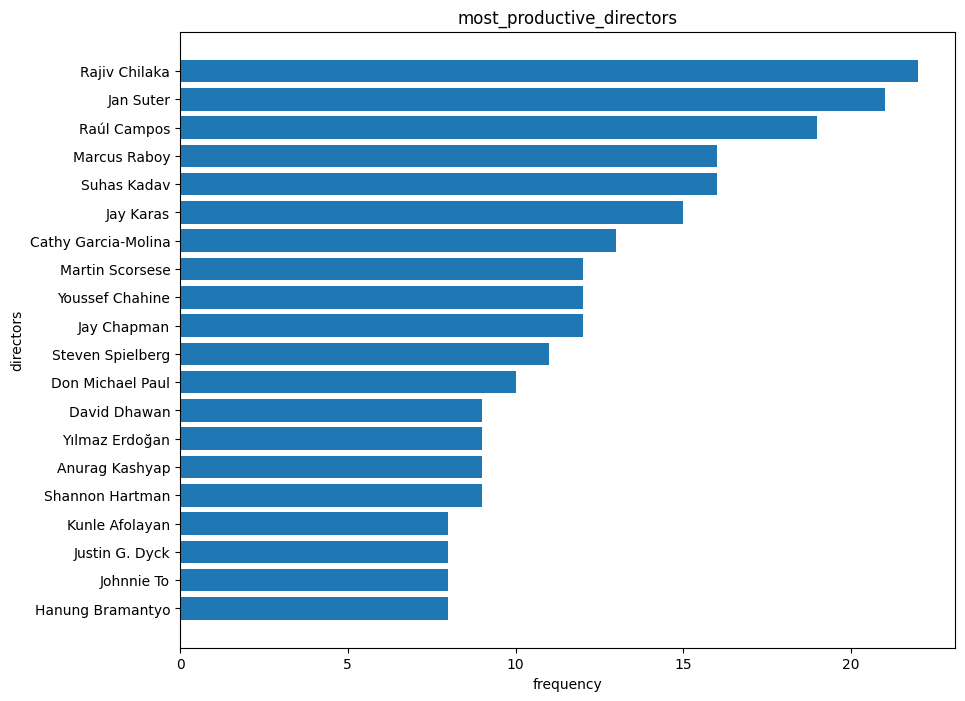

In [105]:
plt.figure(figsize=(10,8))
plt.barh(df_directors[::-1]['director'],df_directors[::-1]['title']) # barh to topple the axis
plt.title('most_productive_directors')
plt.ylabel('directors')
plt.xlabel('frequency')
plt.show()

In [106]:
df_directors_movie= df_final[(df_final['director']!='Unknown_director') & (df_final['type']== 'Movie')].groupby('director').agg({'title': 'nunique'}).reset_index().sort_values(by='title',ascending=False).head(10)
df_directors_tv= df_final[(df_final['director']!='Unknown_director') & (df_final['type']== 'Movie')].groupby('director').agg({'title': 'nunique'}).reset_index().sort_values(by='title',ascending=False).head(10)
df_directors_movie


,director,title
3582,Rajiv Chilaka,22
1817,Jan Suter,21
3633,Raúl Campos,19
4261,Suhas Kadav,16
2739,Marcus Raboy,15
1862,Jay Karas,15
727,Cathy Garcia-Molina,13
2815,Martin Scorsese,12
1859,Jay Chapman,12
4725,Youssef Chahine,12


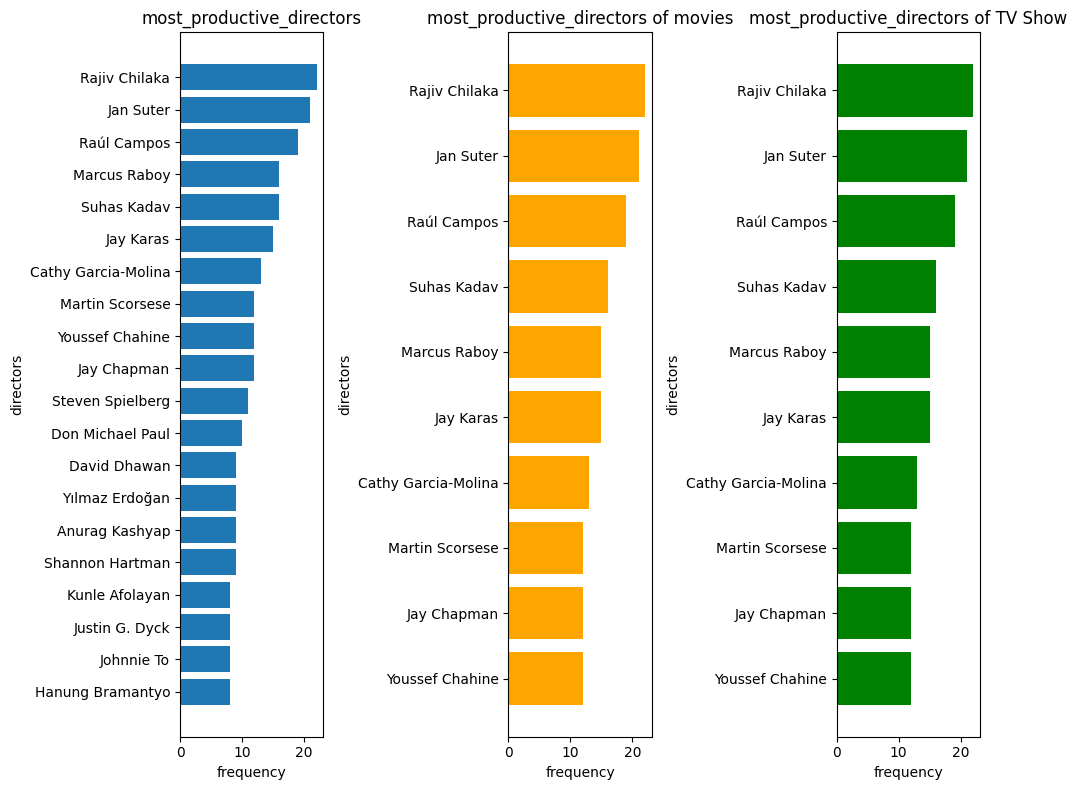

In [107]:
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
plt.barh(df_directors[::-1]['director'],df_directors[::-1]['title']) # barh to topple the axis
plt.title('most_productive_directors')
plt.ylabel('directors')
plt.xlabel('frequency')
plt.subplot(1,3,2)
plt.barh(df_directors_movie[::-1]['director'],df_directors_movie[::-1]['title'],color='orange') # barh to topple the axis
plt.title('most_productive_directors of movies')
plt.ylabel('directors')
plt.xlabel('frequency')
plt.subplot(1,3,3)
plt.barh(df_directors_tv[::-1]['director'],df_directors_tv[::-1]['title'],color='green') # barh to topple the axis
plt.title('most_productive_directors of TV Show')
plt.ylabel('directors')
plt.xlabel('frequency')

plt.tight_layout()
plt.show()

the names in the director is common throughout the combine as well as in movies and tv shows as well Rajiv Chilakia, Jan Sutter ,Raul Campos should check what kind of content these director create that is popular among the audiences.

In [108]:
pd.reset_option("display.max_rows")
filtered_df = df_final[
    df_final['director'].isin([
        'Rajiv Chilaka', 'Jan Suter', 'Raúl Campos',
        'Suhas Kadav', 'Marcus Raboy', 'Jay Karas'
    ])
][['director', 'title']].groupby('director')['title'].apply(list).reset_index()

filtered_df


,director,title
0,Jan Suter,"[Coco y Raulito: Carrusel de ternura, Coco y Raulito: Carrusel de ternura, Luciano Mellera: Infantiloide, Jani Dueñas: Grandes fracasos de ayer y hoy, Fernando Sanjiao: Hombre, Carlos Ballarta: Furia Ñera, Todo lo que sería Lucas Lauriente, Sofía Niño de Rivera: Selección Natural, Malena Pichot: Estupidez compleja, Natalia Valdebenito: El especial, Sebastián Marcelo Wainraich, Ricardo Quevedo: Hay gente así, Arango y Sanint: Ríase el show, Arango y Sanint: Ríase el show, Mea Culpa, El Especial de Alex Fernández, el Especial, Alan Saldaña: Mi vida de pobre, Simplemente Manu NNa, Daniel Sosa: Sosafado, Ricardo O'Farrill: Abrazo navideño, Ricardo O'Farrill: Abrazo navideño, Ricardo O'Farrill: Abrazo navideño, Ricardo O'Farrill: Abrazo navideño, Ricardo O'Farrill: Abrazo navideño, Carlos Ballarta: El amor es de putos, Sofía Niño de Rivera: Exposed, Ricardo O'Farrill Abrazo Genial]"
1,Jay Karas,"[The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, The Main Event, Demetri Martin: The Overthinker, Adam Devine: Best Time of Our Lives, Bill Burr: You People Are All the Same, Ali Wong: Hard Knock Wife, Tom Segura: Disgraceful, Christina P: Mother Inferior, Bill Burr: Walk Your Way Out, Jeff Foxworthy and Larry the Cable Guy: We’ve Been Thinking..., Jeff Foxworthy and Larry the Cable Guy: We’ve Been Thinking..., Jim Gaffigan: Mr. Universe, Ali Wong: Baby Cobra, Tom Segura: Mostly Stories, Anjelah Johnson: Not Fancy, Demetri Martin: Live (At the Time), Bill Burr: I'm Sorry You Feel That Way]"
2,Marcus Raboy,"[Patton Oswalt: I Love Everything, Patton Oswalt: I Love Everything, Patton Oswalt: I Love Everything, Patton Oswalt: I Love Everything, Taylor Tomlinson: Quarter-Life Crisis, Whitney Cummings: Can I Touch It?, Miranda Sings Live…Your Welcome, Anthony Jeselnik: Fire in the Maternity Ward, Vir Das: Losing It, Katt Williams: Kattpacalypse, Steve Martin and Martin Short: An Evening You Will Forget for the Rest of Your Life, Steve Martin and Martin Short: An Evening You Will Forget for the Rest of Your Life, Marlon Wayans: Woke-ish, Judd Apatow: The Return, DeRay Davis: How to Act Black, Ryan Hamilton: Happy Face, Lynne Koplitz: Hormonal Beast, Vir Das: Abroad Understanding, Cristela Alonzo: Lower Classy, Dana Carvey: Straight White Male, 60]"
3,Rajiv Chilaka,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem - Neeli Pahaadi, Chhota Bheem - Neeli Pahaadi, Chhota Bheem - Neeli Pahaadi, Chhota Bheem - Neeli Pahaadi, Chhota Bheem - Neeli Pahaadi, Chhota Bheem - Neeli Pahaadi, Chhota Bheem & Ganesh, Chhota Bheem & Ganesh, Chhota Bheem & Ganesh, Chhota Bheem & Ganesh, Chhota Bheem & Ganesh, Chhota Bheem & Ganesh, Chhota Bheem & Ganesh, Chhota Bheem & Krishna: Mayanagari, Chhota Bheem & Krishna: Mayanagari, Chhota Bheem & Krishna: Mayanagari, Chhota Bheem & Krishna: Mayanagari, Chhota Bheem & Krishna: Mayanagari, Chhota Bheem & Krishna: Mayanagari, Chhota Bheem & Krishna: Mayanagari, Chhota Bheem & Krishna: Pataliputra- City of the Dead, Chhota Bheem & Krishna: Pataliputra- City of the Dead, Chhota Bheem & Krishna: Pataliputra- City of the Dead, Chhota Bheem & Krishna: Pataliputra- City of the Dead, Chhota Bheem & Krishna: Pataliputra- City of the Dead, Chhota Bheem & Krishna: Pataliputra- City of the Dead, Chhota Bheem & Krishna: Pataliputra- City of the Dead, Chhota Bheem And The Broken Amulet, Chhota Bheem And The Broken Amulet, Chhota Bheem And The Broken Amulet, Chhota Bheem And The Broken Amulet, Chhota Bheem And The Broken Amulet, Chhota Bheem And The Broken Amulet, Chhota Bheem And The Broken Amulet, Chhota Bheem And The Crown of Valhalla, Chhota Bheem And 

In [109]:
df_final[
    df_final['director'].isin([
        'Rajiv Chilaka', 'Jan Suter', 'Raúl Campos',
        'Suhas Kadav', 'Marcus Raboy', 'Jay Karas'
    ])
].groupby(['director', 'Genre'])['title'].nunique().reset_index(name='unique_title_count')


,director,Genre,unique_title_count
0,Jan Suter,Stand-Up Comedy,21
1,Jay Karas,Children & Family Movies,1
2,Jay Karas,Comedies,1
3,Jay Karas,Sports Movies,1
4,Jay Karas,Stand-Up Comedy,14
5,Marcus Raboy,Stand-Up Comedy,15
6,Marcus Raboy,Stand-Up Comedy & Talk Shows,1
7,Marcus Raboy,TV Comedies,1
8,Rajiv Chilaka,Children & Family Movies,22
9,Rajiv Chilaka,Sports Movies,2


 so i can Rajiv Chilaka who topped the list of most poular director is making movies of Children and Family(Chhota Bheem) that means this genre has huge audience as well, while jan sutter and raul campos  is known for stand-up comedy(Coco Y Raulito Carrusel De Ternura).


In [110]:
top_actor_genre= df_final[df_final['Individual_actor'].isin(['Anupam Kher', 'Shah Rukh Khan','Julie Tejwani','Naseeruddin Shah'	,'Takahiro Sakurai'])][['Individual_actor', 'Genre']]
top_actor_genre=top_actor_genre.groupby(['Individual_actor'])['Genre'].unique().reset_index()
top_actor_genre

# to plot the graph need to explode the list here

,Individual_actor,Genre
0,Anupam Kher,"[Action & Adventure, Comedies, International Movies, Music & Musicals, Sci-Fi & Fantasy, Dramas, Independent Movies, Thrillers, Romantic Movies, Classic Movies, Children & Family Movies, Crime TV Shows, International TV Shows, TV Comedies]"
1,Julie Tejwani,"[Kids' TV, Children & Family Movies, Sports Movies, Movies]"
2,Naseeruddin Shah,"[Comedies, Dramas, International Movies, Independent Movies, Romantic Movies, Children & Family Movies, Documentaries, Thrillers, Action & Adventure, Music & Musicals, Sci-Fi & Fantasy]"
3,Shah Rukh Khan,"[Dramas, International Movies, Thrillers, Action & Adventure, Comedies, Romantic Movies, Music & Musicals, Sci-Fi & Fantasy]"
4,Takahiro Sakurai,"[Anime Series, International TV Shows, Teen TV Shows, Kids' TV, Anime Features, Romantic Movies, Action & Adventure, International Movies, TV Thrillers, TV Shows, Crime TV Shows]"


In [111]:
#pd.reset_option("display.max_rows")
top_actor_genre= df_final[df_final['Individual_actor'].isin(['Anupam Kher', 'Shah Rukh Khan','Julie Tejwani','Naseeruddin Shah'	,'Takahiro Sakurai'])][['Individual_actor', 'Genre']].drop_duplicates()
top_actor_genre


,Individual_actor,Genre
990,Julie Tejwani,Kids' TV
2491,Shah Rukh Khan,Dramas
2492,Shah Rukh Khan,International Movies
2493,Shah Rukh Khan,Thrillers
4722,Anupam Kher,Action & Adventure
4723,Anupam Kher,Comedies
4724,Anupam Kher,International Movies
5029,Anupam Kher,Music & Musicals
5082,Anupam Kher,Sci-Fi & Fantasy
5404,Naseeruddin Shah,Comedies


<Axes: xlabel='Individual_actor', ylabel='count'>

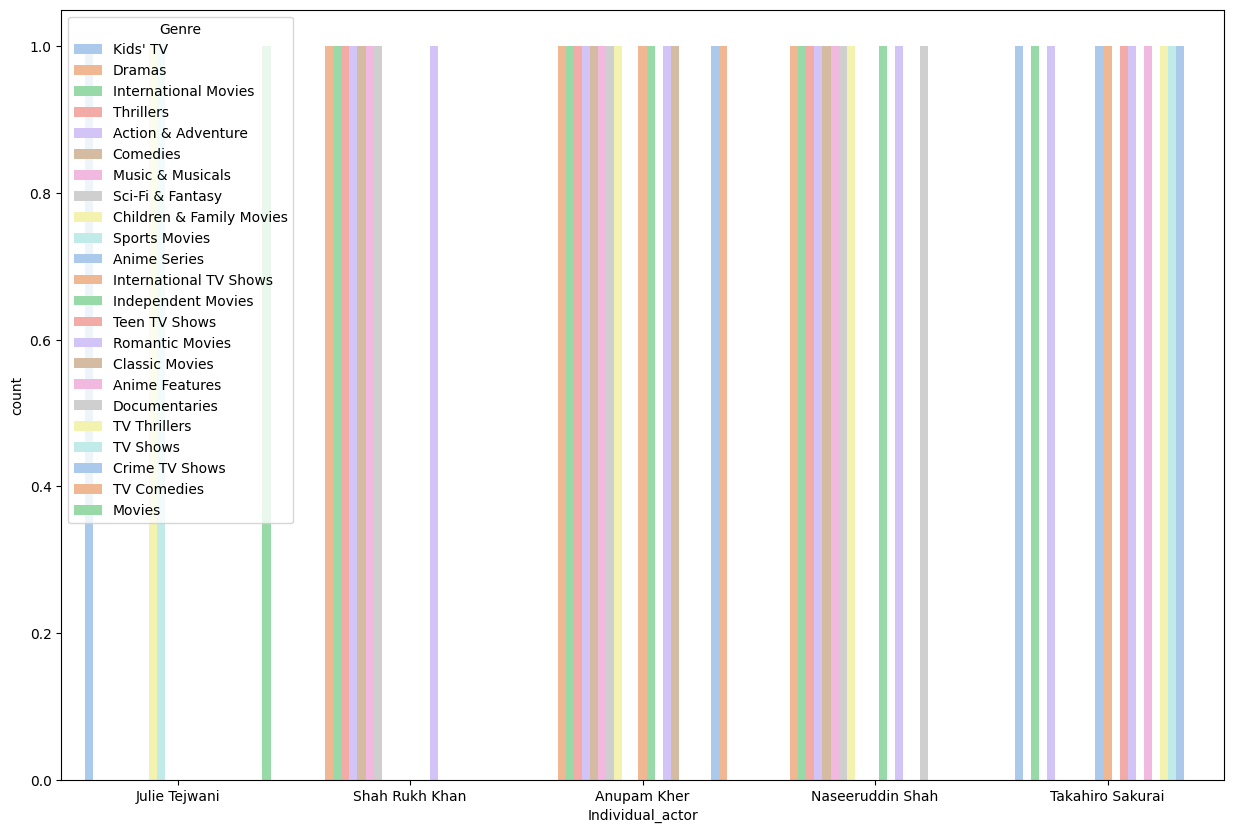

In [112]:
plt.figure(figsize=(15,10))
sns.countplot(data=top_actor_genre,x='Individual_actor',hue='Genre',palette='pastel')

<ipython-input-113-3191ad869073>:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


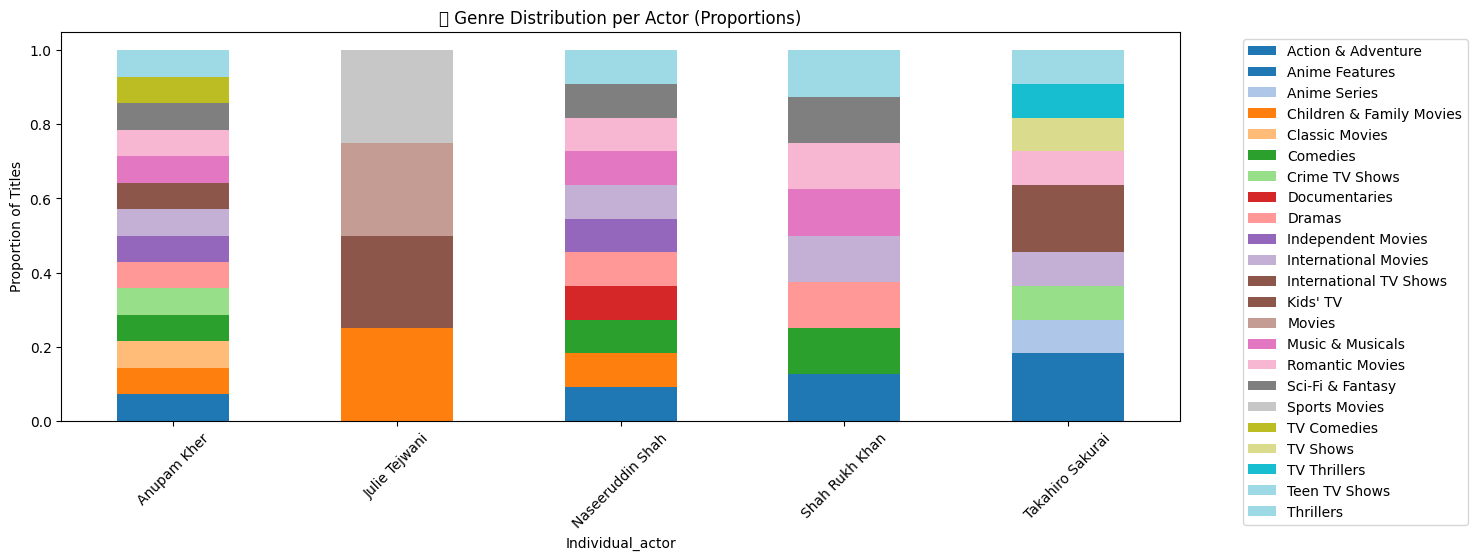

In [113]:
# Count genres per actor
genre_counts = df_final[
    df_final['Individual_actor'].isin([
        'Anupam Kher', 'Shah Rukh Khan', 'Julie Tejwani',
        'Naseeruddin Shah', 'Takahiro Sakurai'
    ])
][['Individual_actor', 'Genre']].drop_duplicates()

# Pivot for stacked bar and size is to calculate number of rows and
genre_counts = genre_counts.groupby(['Individual_actor', 'Genre']).size().reset_index(name='count')
pivot_df = genre_counts.pivot(index='Individual_actor', columns='Genre', values='count')

pivot_df_norm = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Plot normalized bar
pivot_df_norm.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('📊 Genre Distribution per Actor (Proportions)')
plt.ylabel('Proportion of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


here we can say Anupam Kher and Naseeruddin shah  have been more versatile actor who worked in so many genre so did Shah Rukh Khan  and Takahiro Sakurai while Julie Tejwani who is voice artitst for anime sticked to children & Family Movie and sports and tv Gnere that was his forte.


In [114]:
df_corr=df_final.select_dtypes(include=np.number).corr()

<Axes: >

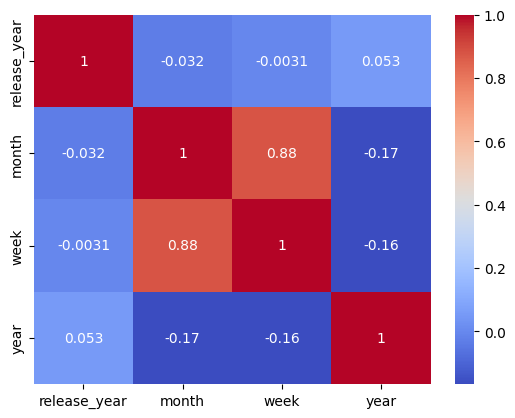

In [115]:
sns.heatmap(df_corr,cmap='coolwarm',annot=True)
# these year week  month and  release_year from the date added

In [116]:
pd.reset_option("display.max_rows")
df_final

,title,Individual_actor,country,director,Genre,show_id,type,date_added,release_year,rating,duration,duration_movies,modified_date_added,month,week,year
0,Dick Johnson Is Dead,Unknown_actor,United States,Kirsten Johnson,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,50-100,50-100,2021-09-25,9,38,2021
1,Blood & Water,Ama Qamata,South Africa,Unknown_director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,South Africa,Unknown_director,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,South Africa,Unknown_director,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,South Africa,Unknown_director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9,38,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,India,Mozez Singh,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,100-150,100-150,2019-03-02,3,9,2019
201987,Zubaan,Anita Shabdish,India,Mozez Singh,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,100-150,100-150,2019-03-02,3,9,2019
201988,Zubaan,Chittaranjan Tripathy,India,Mozez Singh,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,100-150,100-150,2019-03-02,3,9,2019
201989,Zubaan,Chittaranjan Tripathy,India,Mozez Singh,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,100-150,100-150,2019-03-02,3,9,2019


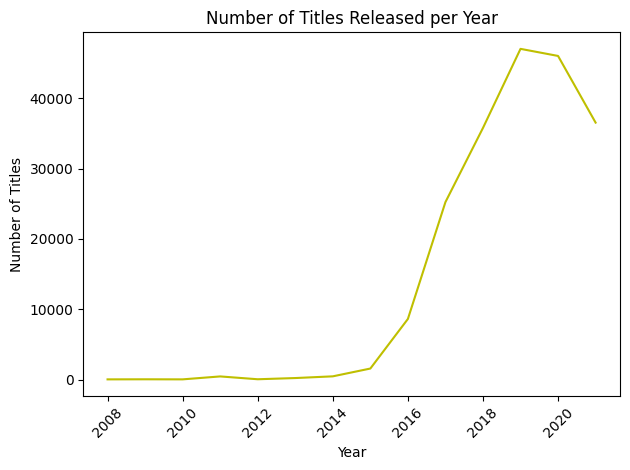

In [117]:
# Count number of titles per year
yearly_counts = df_final.groupby('year')['title'].count().reset_index()

sns.lineplot(data=yearly_counts, x='year', y='title',color='y')
plt.title('Number of Titles Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [118]:
# want to test top 5 countries genre distribution
df_country_genre_us=df_final[df_final['country']=='United States'].groupby('Genre').agg({'title':'count'}).reset_index().sort_values(by= 'title',ascending=False).head(10)
df_country_genre_India=df_final[df_final['country']=='India'].groupby('Genre').agg({'title':'count'}).reset_index().sort_values(by= 'title',ascending=False).head(10)
df_country_genre_UK=df_final[df_final['country']=='United Kingdom'].groupby('Genre').agg({'title':'count'}).reset_index().sort_values(by= 'title',ascending=False).head(10)
df_country_genre_Canada=df_final[df_final['country']=='Canada'].groupby('Genre').agg({'title':'count'}).reset_index().sort_values(by= 'title',ascending=False).head(10)
df_country_genre_france=df_final[df_final['country']=='France'].groupby('Genre').agg({'title':'count'}).reset_index().sort_values(by= 'title',ascending=False).head(10)

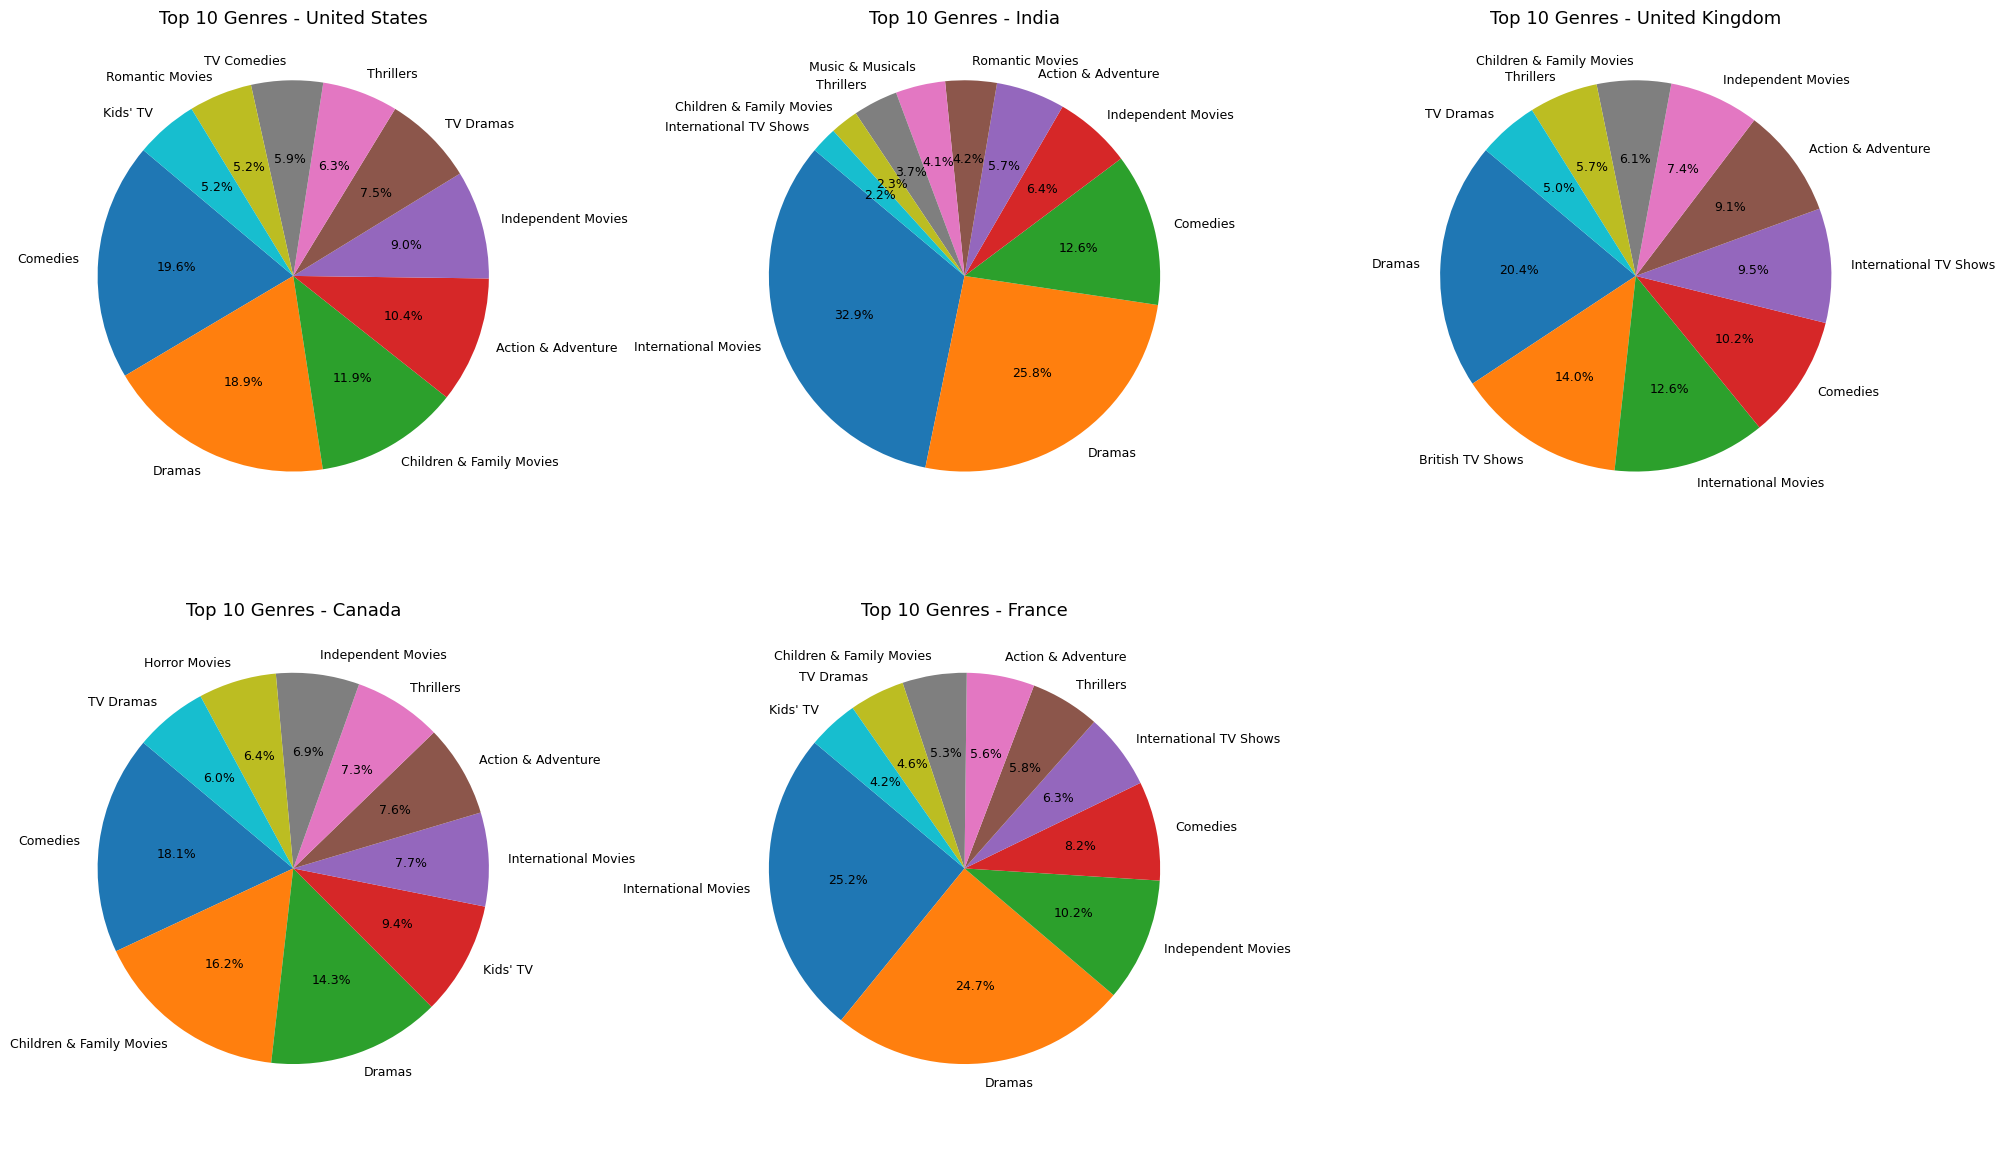

In [119]:
import matplotlib.pyplot as plt

# Create figure with 2 rows & 3 columns (one will be empty)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# List of your dataframes and titles
genre_data = [
    (df_country_genre_us, "United States"),
    (df_country_genre_India, "India"),
    (df_country_genre_UK, "United Kingdom"),
    (df_country_genre_Canada, "Canada"),
    (df_country_genre_france, "France")
]

# Loop through each subplot and assign pie chart
for ax, (df, country) in zip(axes.flat, genre_data):
    ax.pie(
        df['title'],
        labels=df['Genre'],
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 9}
    )
    ax.set_title(f"Top 10 Genres - {country}", fontsize=13)

# Hide the 6th (empty) subplot
if len(genre_data) < 6:
    axes.flat[-1].axis('off')

plt.tight_layout()
plt.show()


we can see that how different genres popular across diffrent countries in US COMEDY, DRAMAS , CHILDREN & FAMILY MOVIES ACTION AND ADVENTURE dominating the market share.
In India surplrisingly it is INTERNATIONAL MOVIES, DRAMAS CONSTITUTE MORE THAN 55% followed by comdies by 12%. almost similar to France where people also majorly watching these two.
In United Kingdom there is dramas and their own british shows is popular among them .

we have already seen in the non graphic analysis that from the year 2018 the number of titles got added is highest till 2021

<ipython-input-120-3722f463b547>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_5_genre,x='Genre',y='year',palette='Set2')


<Axes: xlabel='Genre', ylabel='year'>

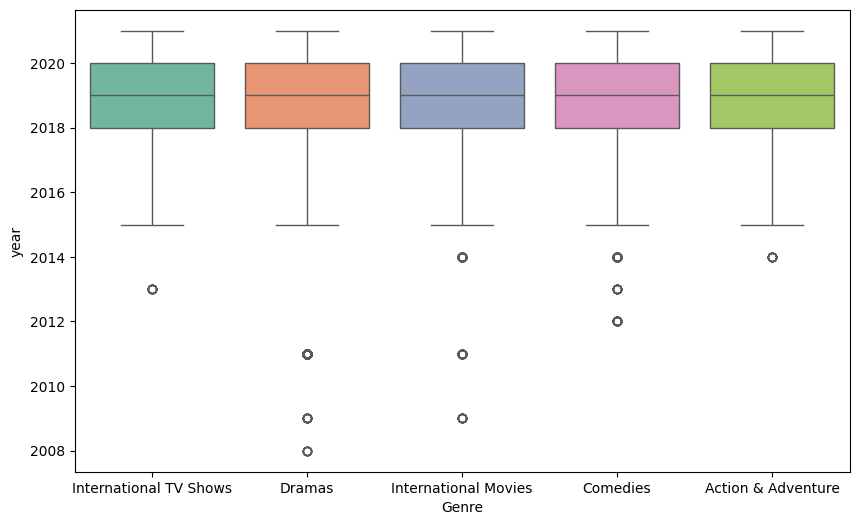

In [120]:
  # want to test the top 7 genre across the years
  top_5_genre=df_final['Genre'].value_counts().head(5).index  # can also do the group by but this also good coz get us all the df_final with these genre
  top_5_genre=df_final[df_final['Genre'].isin(top_5_genre)]
  top_5_genre

  plt.figure(figsize=(10, 6))
  sns.boxplot(data=top_5_genre,x='Genre',y='year',palette='Set2')

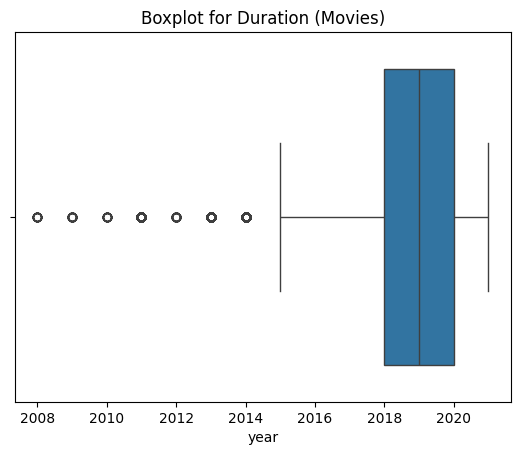

In [121]:
sns.boxplot(x=df_final['year'])
plt.title('Boxplot for Duration (Movies)')
plt.show()


In [122]:
Q1 = df_final['year'].quantile(0.25)
Q3 = df_final['year'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned=df_final[(df_final['year'] >= lower_bound) &  (df_final['year'] <= upper_bound)]
df_cleaned

,title,Individual_actor,country,director,Genre,show_id,type,date_added,release_year,rating,duration,duration_movies,modified_date_added,month,week,year
0,Dick Johnson Is Dead,Unknown_actor,United States,Kirsten Johnson,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,50-100,50-100,2021-09-25,9,38,2021
1,Blood & Water,Ama Qamata,South Africa,Unknown_director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,South Africa,Unknown_director,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,South Africa,Unknown_director,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,South Africa,Unknown_director,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9,38,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,India,Mozez Singh,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,100-150,100-150,2019-03-02,3,9,2019
201987,Zubaan,Anita Shabdish,India,Mozez Singh,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,100-150,100-150,2019-03-02,3,9,2019
201988,Zubaan,Chittaranjan Tripathy,India,Mozez Singh,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,100-150,100-150,2019-03-02,3,9,2019
201989,Zubaan,Chittaranjan Tripathy,India,Mozez Singh,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,100-150,100-150,2019-03-02,3,9,2019


# recomendations for the review
⦁	most liked and evergreen  content on the both the platfrom is both mvoies and tv shows  Dramas , International movies and TVs shows  and comedies,in tv - crime tv shows  that must be updated in the libraries on monnthly basis. while poplar actors mostly folowing the trend of action adventure which is quite popular in movies.

⦁	most audience prefer movies in the  [50-150]minutes segment. This must be also be a directors's choice as well.

⦁	audience likes to watch more versatile and most famous directors movies, library of content must include them on bi-montly basis.

⦁	recent popular actor and directors combo cannot be overlooked for audience, which even surpassing the best actors of the decade.

⦁	content for child& family is less as conmpared to other content.
⦁	audience prefers  the tv-MA and R-rating content the most while in India they are more inclined to tv-14 content.

⦁	library content is india is almost half from 2018 to 2021.

⦁	most popular tv shows among the public are of Genre classic & cult , tv comedies, crime tv shows , tv dramas, tv science, audiencde are more baised towards them.

⦁	recently korean and Japaneese shows are getting popular audience has a new region to their liking especialy the anima and korean dramas.

⦁	in the month of july and  december  and is the best month to add the most awaited content or exlusive titles due to  summer season  and christmas holiday.